In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')

In [3]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [4]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [5]:
df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [7]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#We can see that the dataset do have some skewness and outliers especially by looking at the large differences between the 75th percentile and max values

In [8]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

<Axes: >

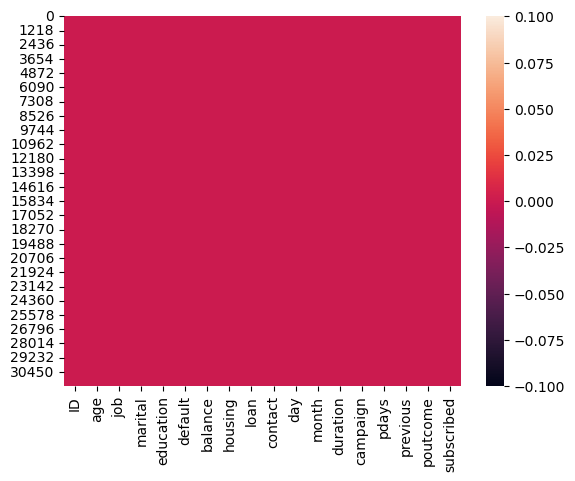

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.duplicated().sum()

0

In [11]:
nan= df.isna().sum()

In [12]:
cat_col = df.select_dtypes(include=['object']).columns
cat_summary = {column: df[column].value_counts() for column in cat_col}
cat_summary

{'job': job
 blue-collar      6842
 management       6639
 technician       5307
 admin.           3631
 services         2903
 retired          1574
 self-employed    1123
 entrepreneur     1008
 unemployed        905
 housemaid         874
 student           635
 unknown           206
 Name: count, dtype: int64,
 'marital': marital
 married     19095
 single       8922
 divorced     3630
 Name: count, dtype: int64,
 'education': education
 secondary    16224
 tertiary      9301
 primary       4808
 unknown       1314
 Name: count, dtype: int64,
 'default': default
 no     31062
 yes      585
 Name: count, dtype: int64,
 'housing': housing
 yes    17584
 no     14063
 Name: count, dtype: int64,
 'loan': loan
 no     26516
 yes     5131
 Name: count, dtype: int64,
 'contact': contact
 cellular     20423
 unknown       9177
 telephone     2047
 Name: count, dtype: int64,
 'month': month
 may    9669
 jul    4844
 aug    4333
 jun    3738
 nov    2783
 apr    2055
 feb    1827
 jan     9

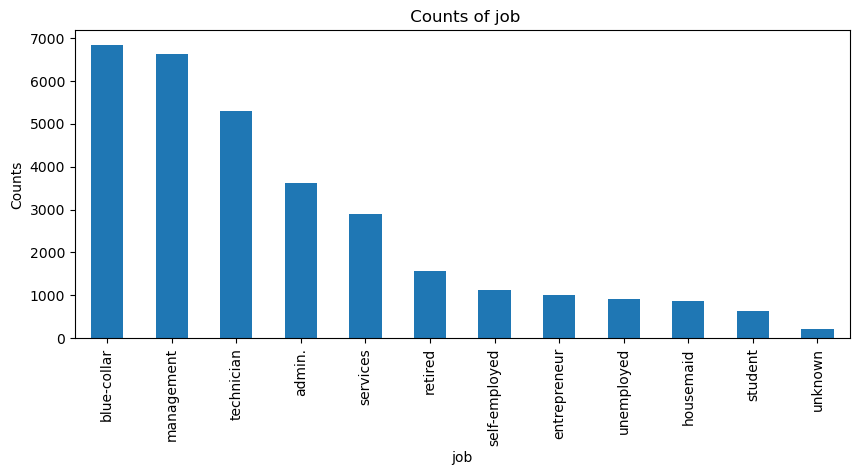

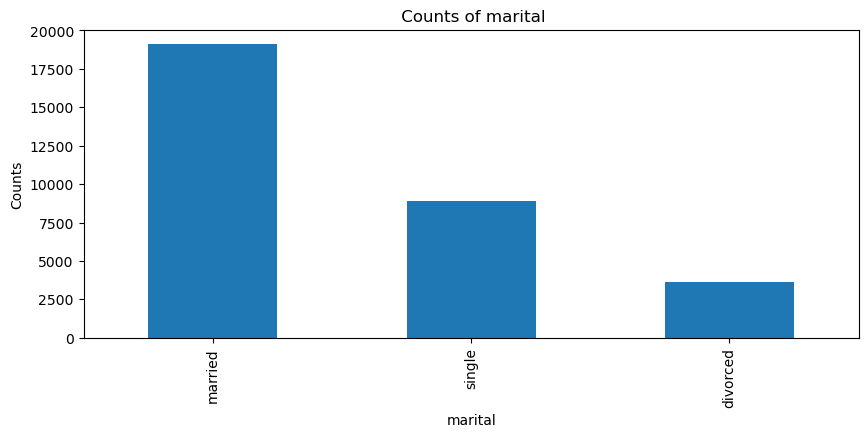

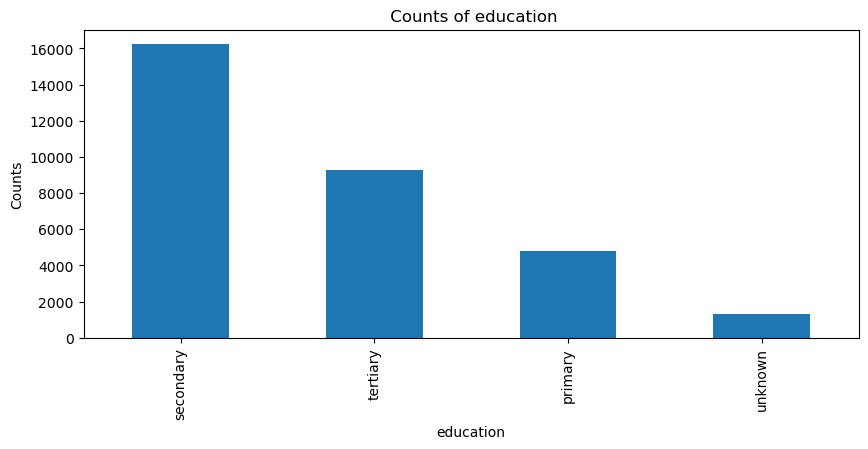

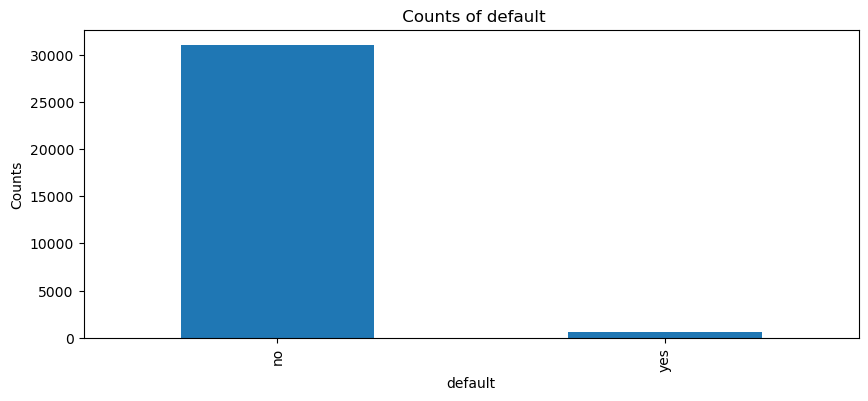

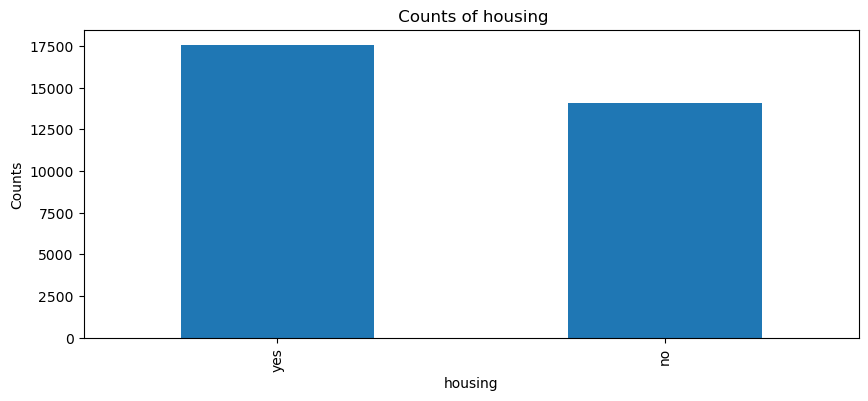

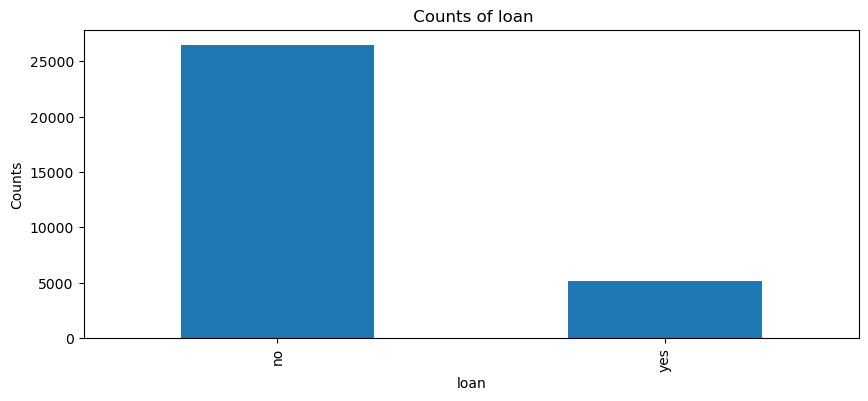

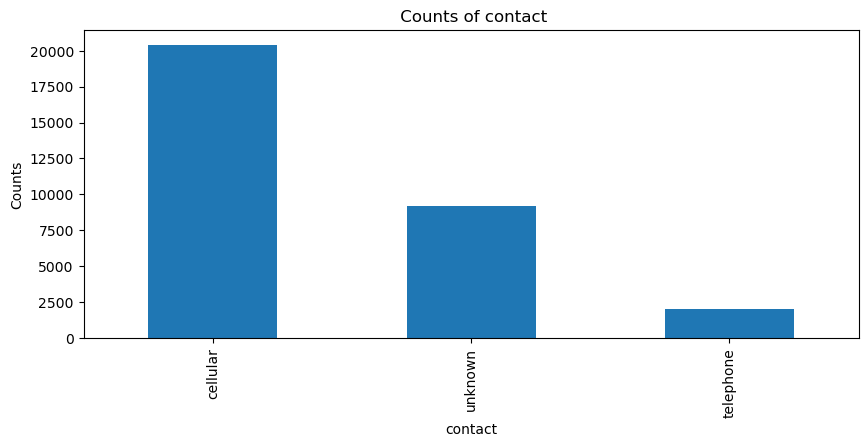

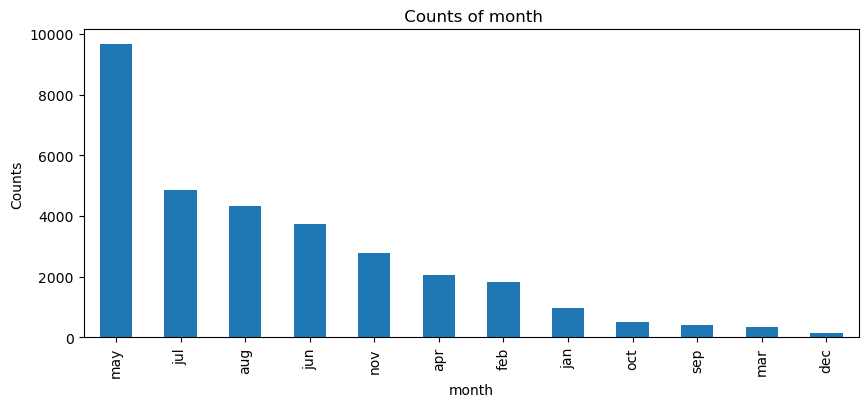

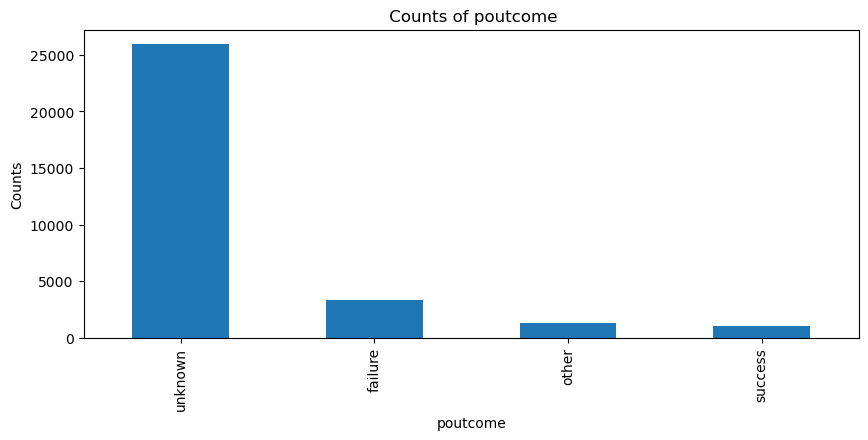

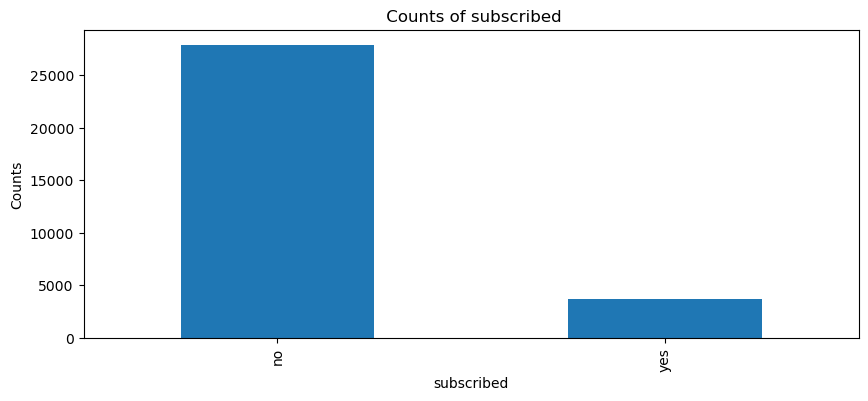

In [13]:
for column in cat_col:
    plt.figure(figsize=(10, 4)) 
    df[column].value_counts().plot(kind='bar') 
    plt.title(f' Counts of {column}') 
    plt.xlabel(column)  
    plt.ylabel('Counts') 
    plt.show() 

#Here we can see that there are a lot of people in blue collar job followed by management, technician, admin, services etc.
#There are higher number of married people compared to single and divorced which also suggest that married people usually have higher expenses compared to the other groups
#In terms of the client's educational profile, a lot of people have secondary education followed by tertiary and this also suggests the higher count for blue collar job.
#We can see really low number of defaults
#We can see that a lot of customers have housing loans
#Really low of levels of personal loan
#Higher number of cellular contacts followed by unknown and telephone
#A high count of contact month is in May
#for poutcome we can see very less success for the last campaign
#Bad level of subscribed 



In [14]:
num_col = df.select_dtypes(include=['int64']).columns
num_summary = {column: df[column].value_counts() for column in num_col}
num_summary

{'ID': ID
 26110    1
 13339    1
 39681    1
 15135    1
 26037    1
         ..
 1247     1
 15584    1
 25376    1
 38699    1
 14156    1
 Name: count, Length: 31647, dtype: int64,
 'age': age
 32    1457
 31    1417
 33    1406
 34    1321
 35    1314
       ... 
 92       1
 95       1
 93       1
 94       1
 90       1
 Name: count, Length: 76, dtype: int64,
 'balance': balance
  0        2470
  1         137
  2         109
  4          95
  3          88
           ... 
  15120       1
 -713         1
 -905         1
  4722        1
  2968        1
 Name: count, Length: 6326, dtype: int64,
 'day': day
 20    1909
 18    1612
 21    1445
 5     1373
 6     1348
 17    1344
 14    1283
 8     1281
 28    1276
 29    1241
 7     1240
 19    1228
 15    1208
 12    1116
 13    1099
 9     1097
 30    1082
 4     1016
 11    1014
 16     981
 2      900
 27     804
 3      761
 26     761
 23     657
 22     640
 25     586
 31     460
 10     360
 24     305
 1      220
 Name: co

age
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: count, Length: 76, dtype: int64


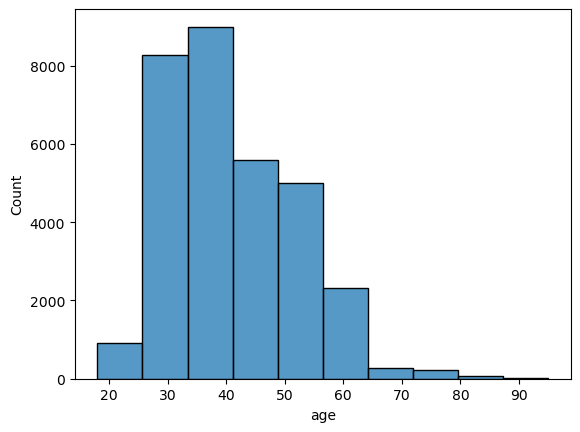

In [15]:
print(df['age'].value_counts())
plott = sns.histplot(x='age', data=df, bins=10)
plt.show()

In [16]:
#We can see that the majoirty of clients in this dataset fall under the 30 to 50 category. There are a lot of people however within the range of 30 to 40

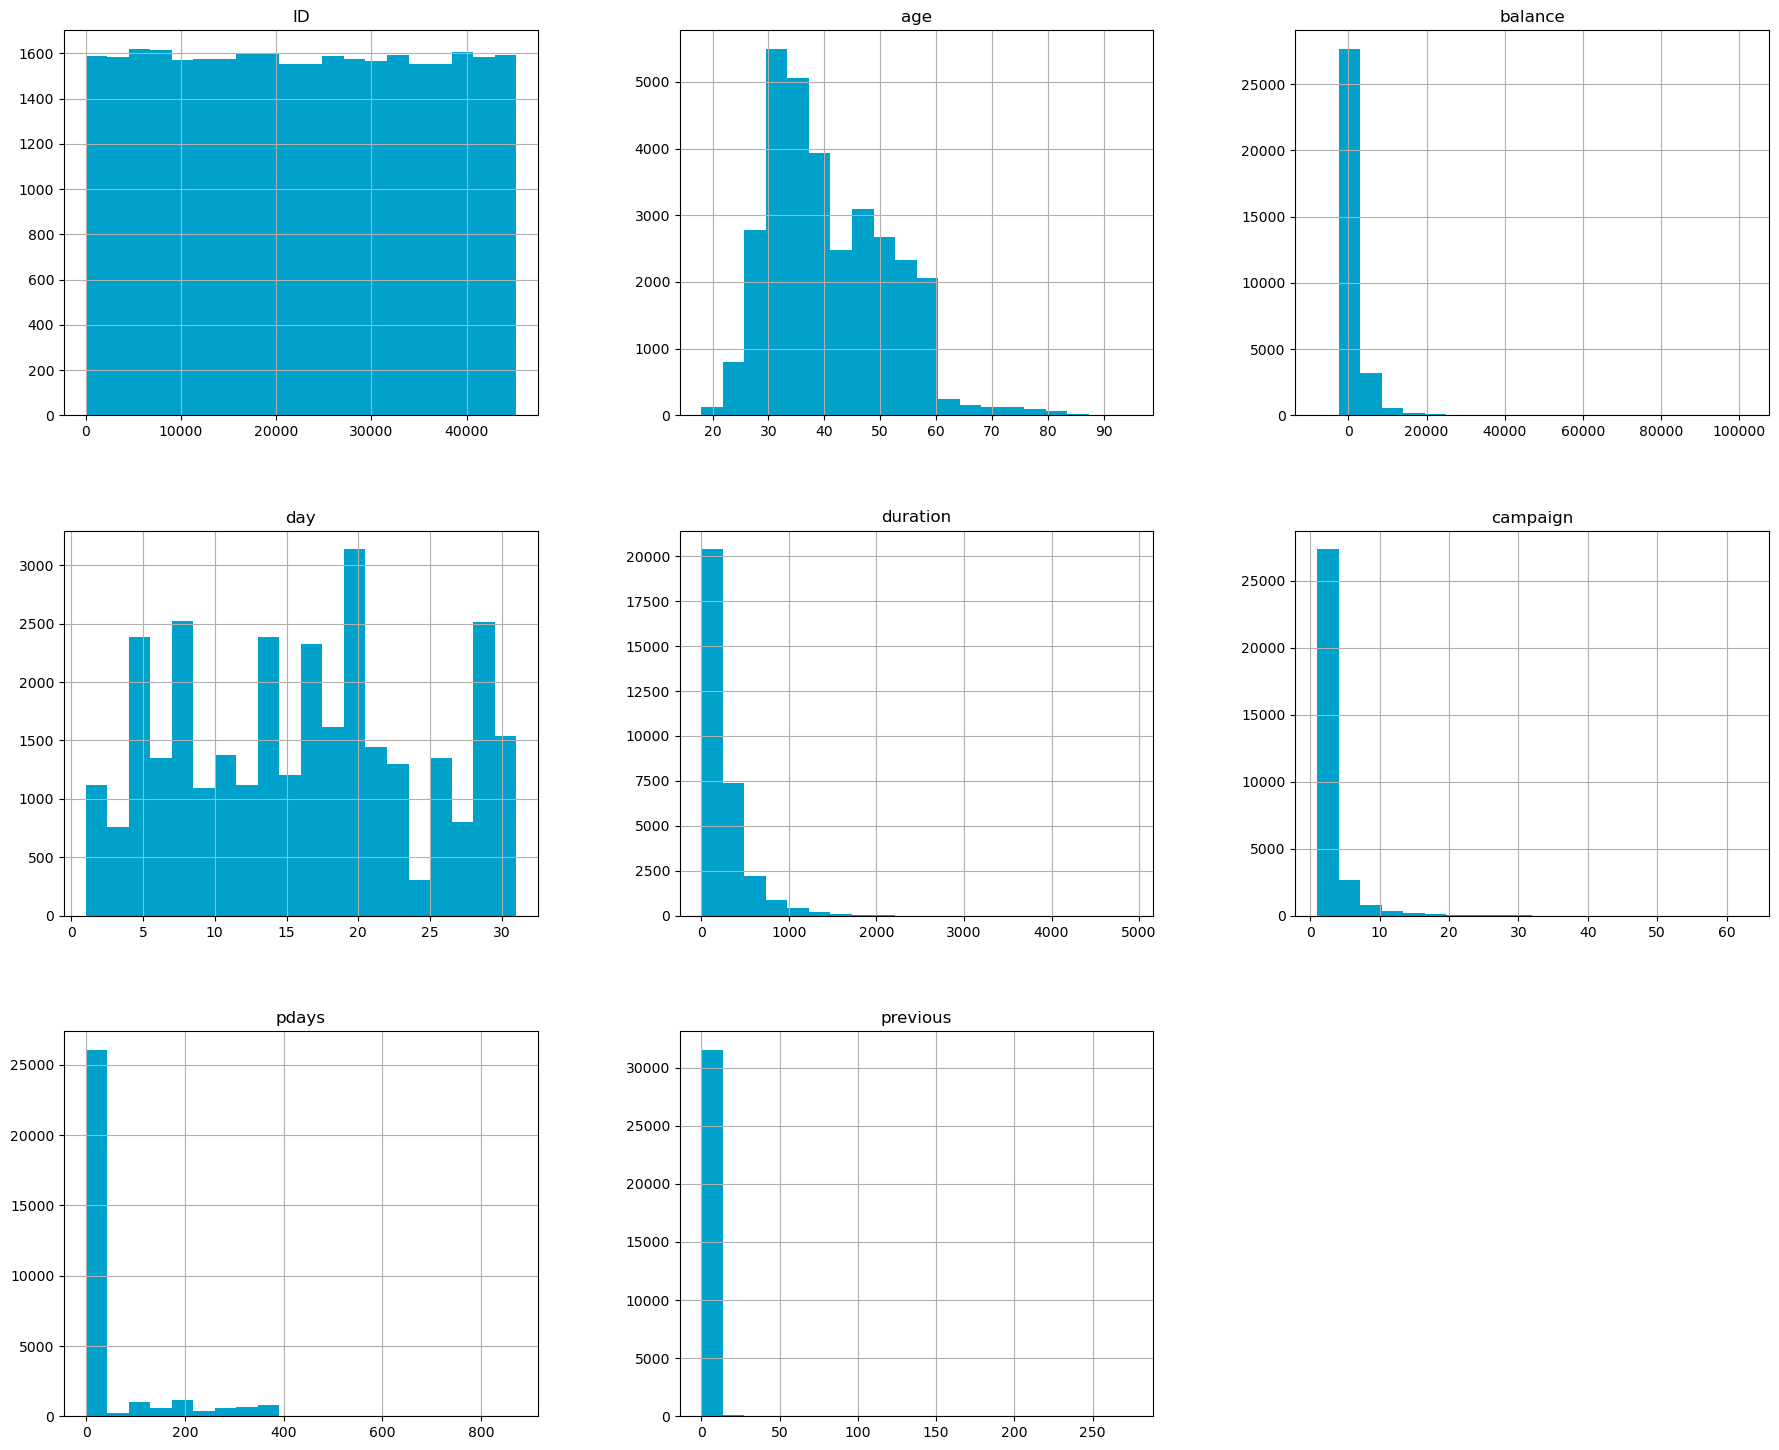

In [17]:
df.hist(bins=20, figsize=(22,18), color='#00a1cb');

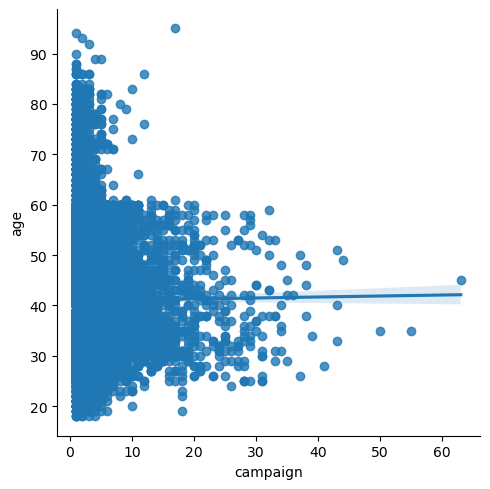

In [28]:
sns.lmplot(x='campaign', y='age', data=df)

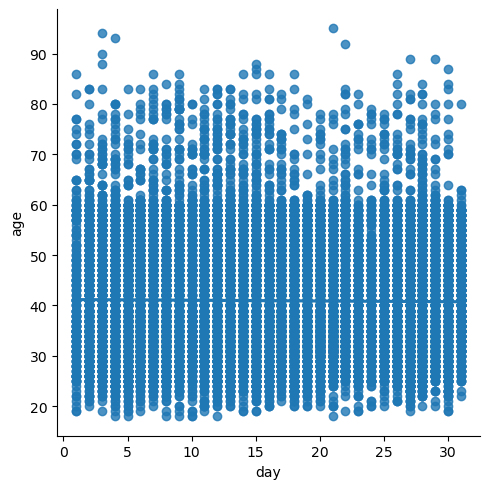

In [29]:
sns.lmplot(x='day', y='age', data=df)

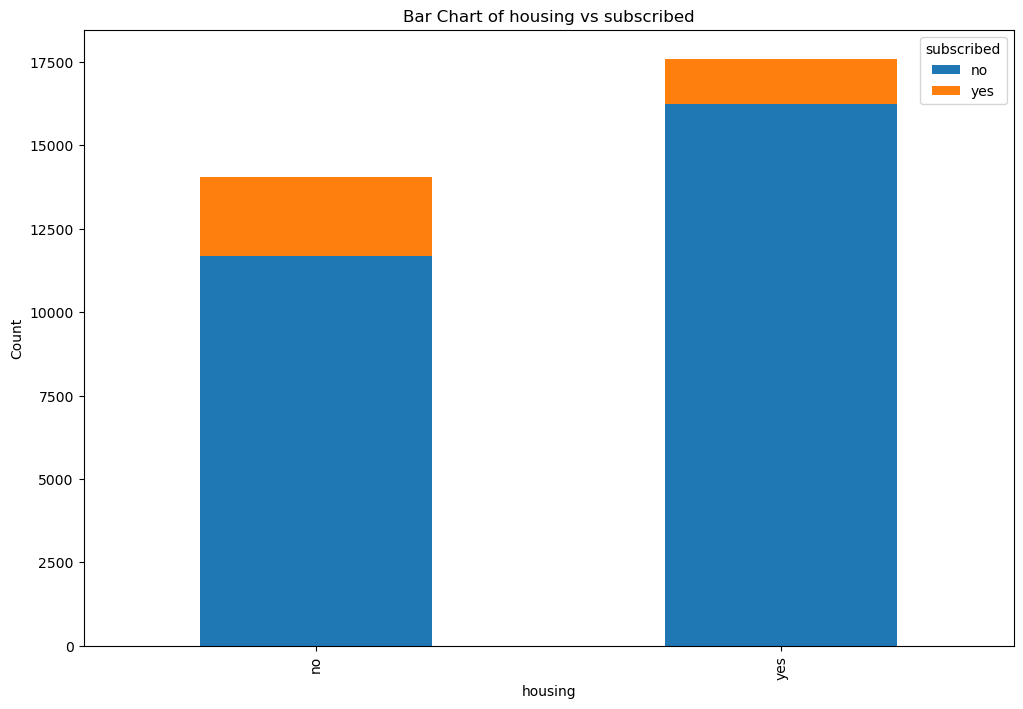

In [30]:
cat_col1 = 'housing'  
cat_col2 = 'subscribed' 
check_relation = pd.crosstab(df[cat_col1], df[cat_col2])
check_relation.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title(f'Bar Chart of {cat_col1} vs {cat_col2}')
plt.ylabel('Count')
plt.show()

In [31]:
#Here we can see that clients with no housing loan are more likely to subscribe to term deposit than clients with housing loan

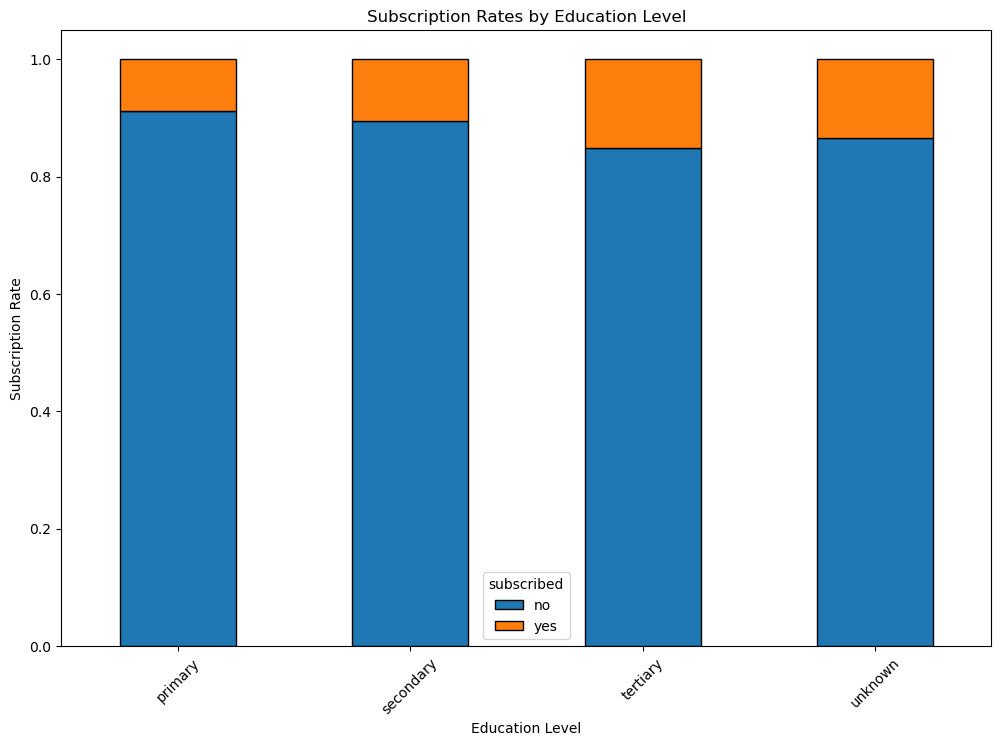

In [32]:
cat_col1 = 'education'
cat_col2 = 'subscribed'
rate_of_subscription = pd.crosstab(df[cat_col1], df[cat_col2], normalize='index')
rate_of_subscription.plot(kind='bar', stacked=True, figsize=(12,8), edgecolor='black')
plt.title(f'Subscription Rates by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=45) 
plt.legend(title=cat_col2)
plt.show()


In [33]:
#Here we can see that the term deposit rates are higher for people with tertiary levels (majority of the bank clients have secondary level of education)

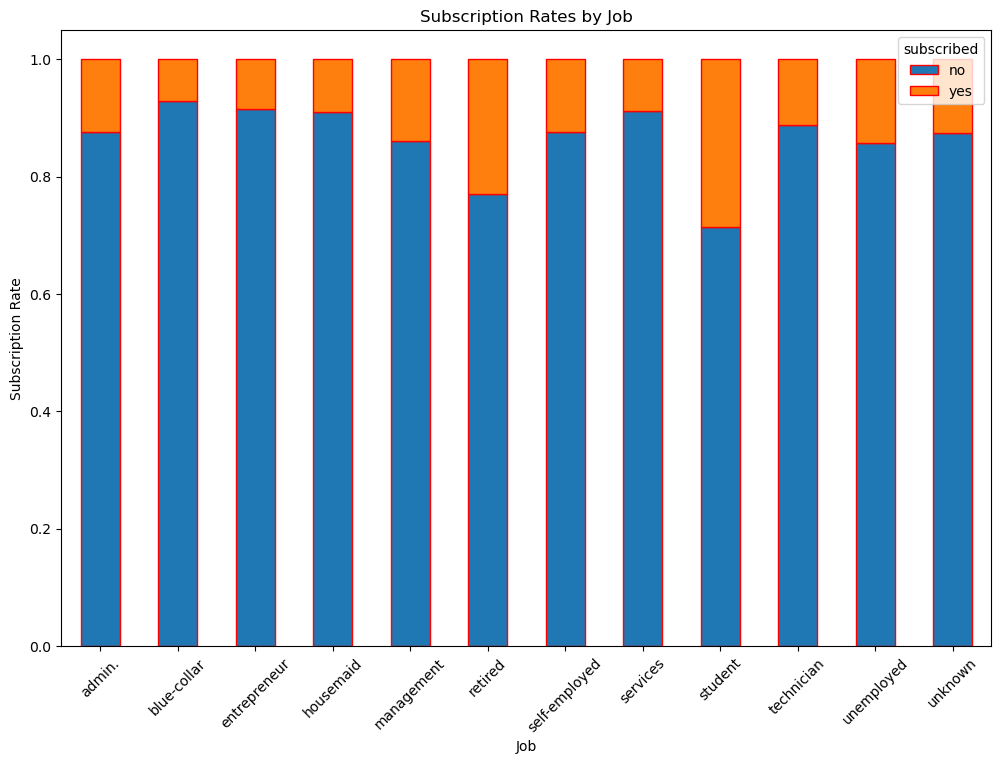

In [34]:
cat_col1 = 'job'
cat_col2 = 'subscribed'
rate_of_subscription = pd.crosstab(df[cat_col1], df[cat_col2], normalize='index')
rate_of_subscription.plot(kind='bar', stacked=True, figsize=(12,8), edgecolor='red')
plt.title(f'Subscription Rates by Job')
plt.xlabel('Job')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=45)  
plt.legend(title=cat_col2)
plt.show()


In [35]:
#This is very interesting to see that despite higher levels of client associating with blue-collar jobs, the highest number of term deposits are done by students followed by retired, management and unemployed people

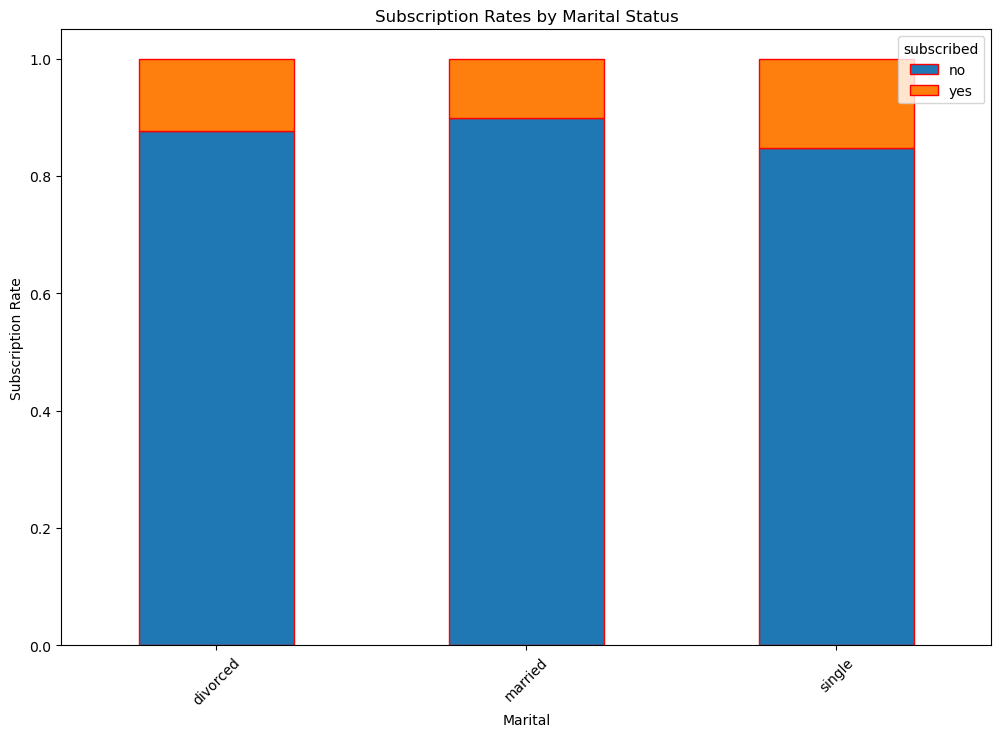

In [36]:
cat_col1 = 'marital'
cat_col2 = 'subscribed'
rate_of_subscription = pd.crosstab(df[cat_col1], df[cat_col2], normalize='index')
rate_of_subscription.plot(kind='bar', stacked=True, figsize=(12,8), edgecolor='red')
plt.title(f'Subscription Rates by Marital Status')
plt.xlabel('Marital')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=45)  
plt.legend(title=cat_col2)
plt.show()

In [37]:
#This graph confirms the previous analysis since single or divorced people are more likely to subscribe to term deposits than married 

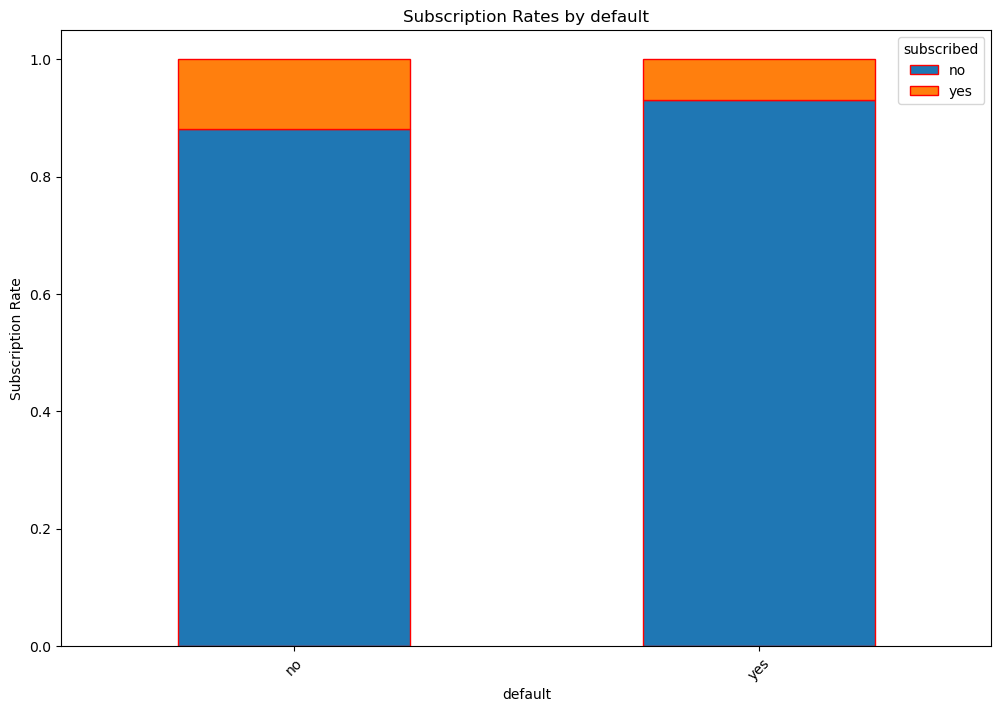

In [38]:
cat_col1 = 'default'
cat_col2 = 'subscribed'
rate_of_subscription = pd.crosstab(df[cat_col1], df[cat_col2], normalize='index')
rate_of_subscription.plot(kind='bar', stacked=True, figsize=(12,8), edgecolor='red')
plt.title(f'Subscription Rates by default')
plt.xlabel('default')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=45)  
plt.legend(title=cat_col2)
plt.show()

In [39]:
#We can see that clients who have not defaulted are more likely to subscribe

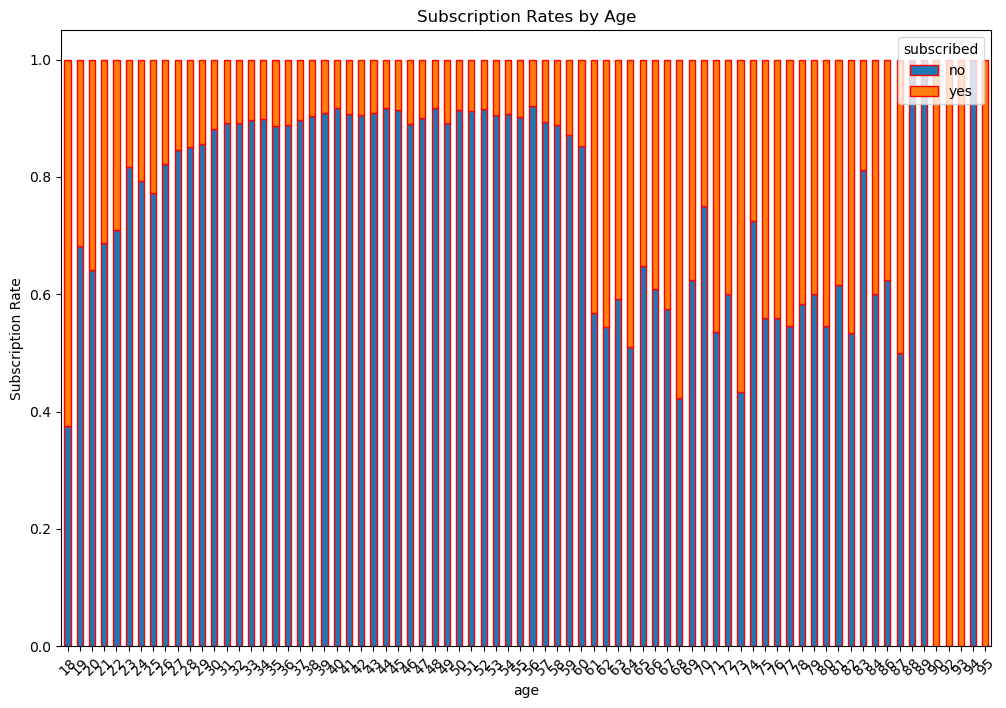

In [40]:
cat_col1 = 'age'
cat_col2 = 'subscribed'
rate_of_subscription = pd.crosstab(df[cat_col1], df[cat_col2], normalize='index')
rate_of_subscription.plot(kind='bar', stacked=True, figsize=(12,8), edgecolor='red')
plt.title(f'Subscription Rates by Age')
plt.xlabel('age')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=45)  
plt.legend(title=cat_col2)
plt.show()

In [41]:
#Here we can see the age range, this confirms the previous analysis since students likely in the age of 18 are likely to deposit. Clients above 80 are more lilely to deposit. Regardless of having a large clientele of ages between 30 to 50. People in this range are less likely to deposit compared to the late stages

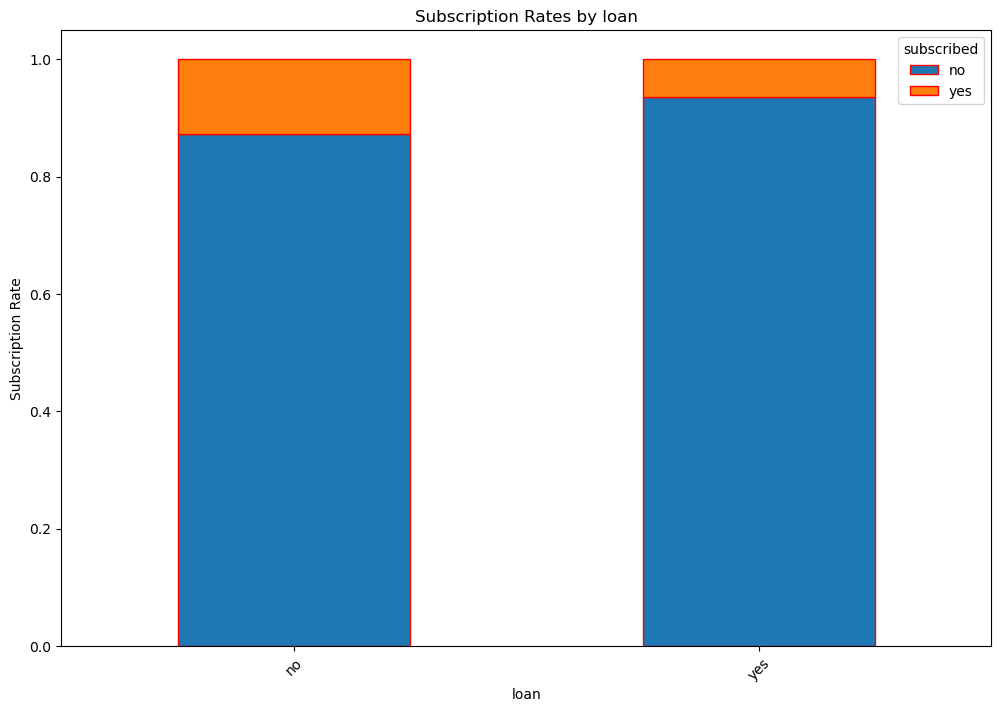

In [42]:
cat_col1 = 'loan'
cat_col2 = 'subscribed'
rate_of_subscription = pd.crosstab(df[cat_col1], df[cat_col2], normalize='index')
rate_of_subscription.plot(kind='bar', stacked=True, figsize=(12,8), edgecolor='red')
plt.title(f'Subscription Rates by loan')
plt.xlabel('loan')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=45)  
plt.legend(title=cat_col2)
plt.show()

In [43]:
#Here we can see that clients with no loans are likely to deposit

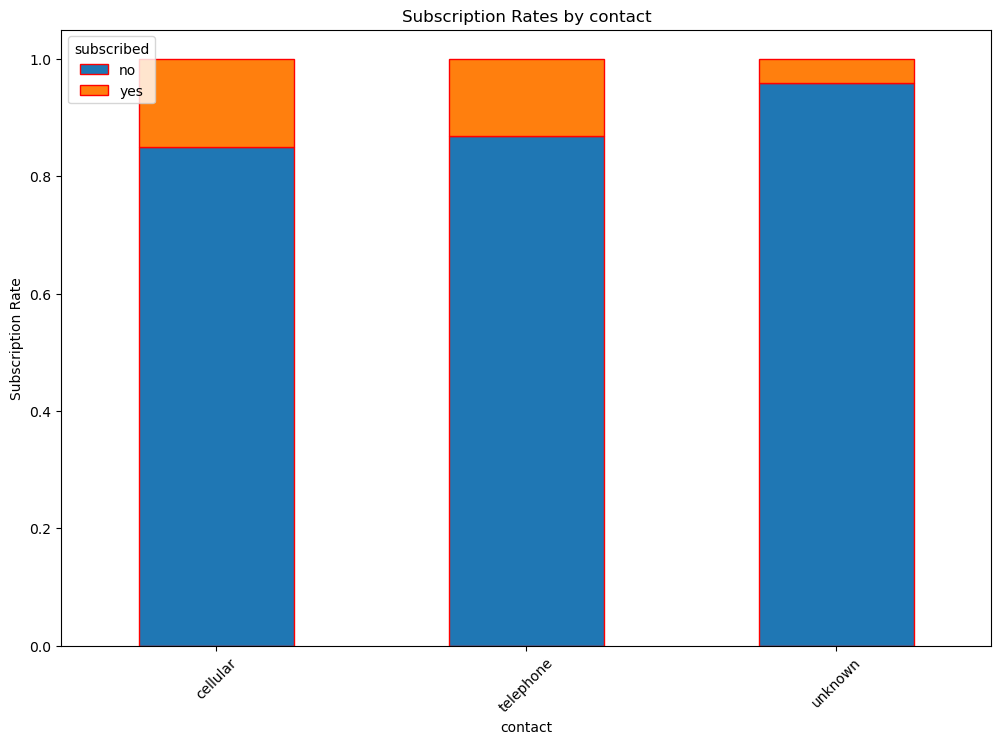

In [44]:
cat_col1 = 'contact'
cat_col2 = 'subscribed'
rate_of_subscription = pd.crosstab(df[cat_col1], df[cat_col2], normalize='index')
rate_of_subscription.plot(kind='bar', stacked=True, figsize=(12,8), edgecolor='red')
plt.title(f'Subscription Rates by contact')
plt.xlabel('contact')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=45)  
plt.legend(title=cat_col2)
plt.show()

In [45]:
#Here we can see that the term deposit rates are higher when contacted via cellular or telephone

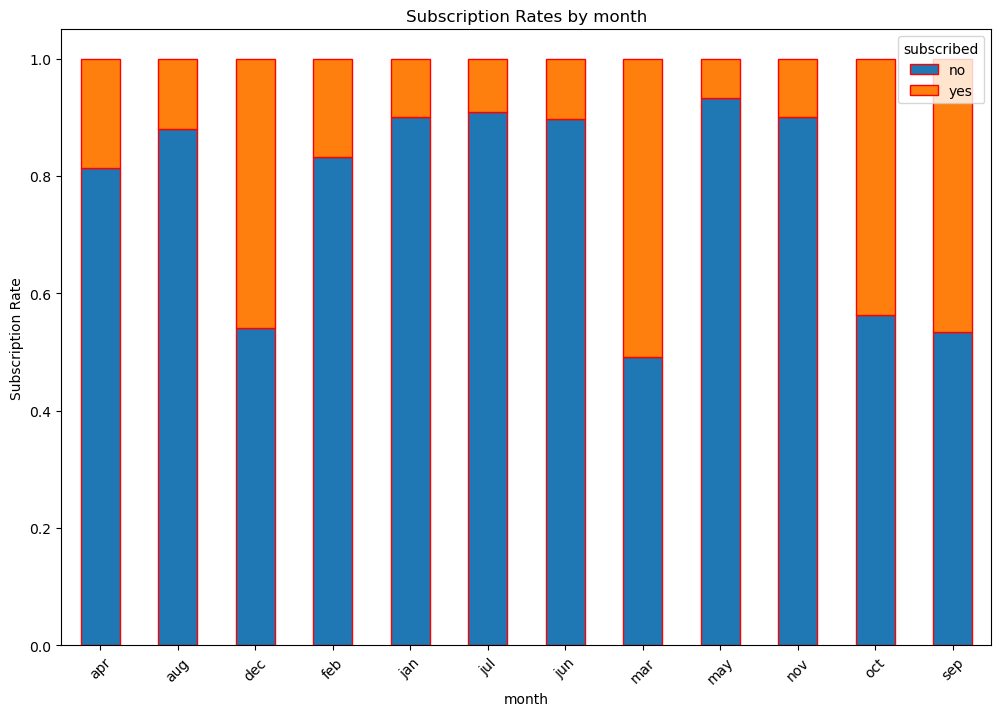

In [46]:
cat_col1 = 'month'
cat_col2 = 'subscribed'
rate_of_subscription = pd.crosstab(df[cat_col1], df[cat_col2], normalize='index')
rate_of_subscription.plot(kind='bar', stacked=True, figsize=(12,8), edgecolor='red')
plt.title(f'Subscription Rates by month')
plt.xlabel('month')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=45)  
plt.legend(title=cat_col2)
plt.show()

In [47]:
#Here we can see that when contacted in the last months of the year, people are more likely to deposit than the start of the year. However, a lot of people subscribed in the month of march

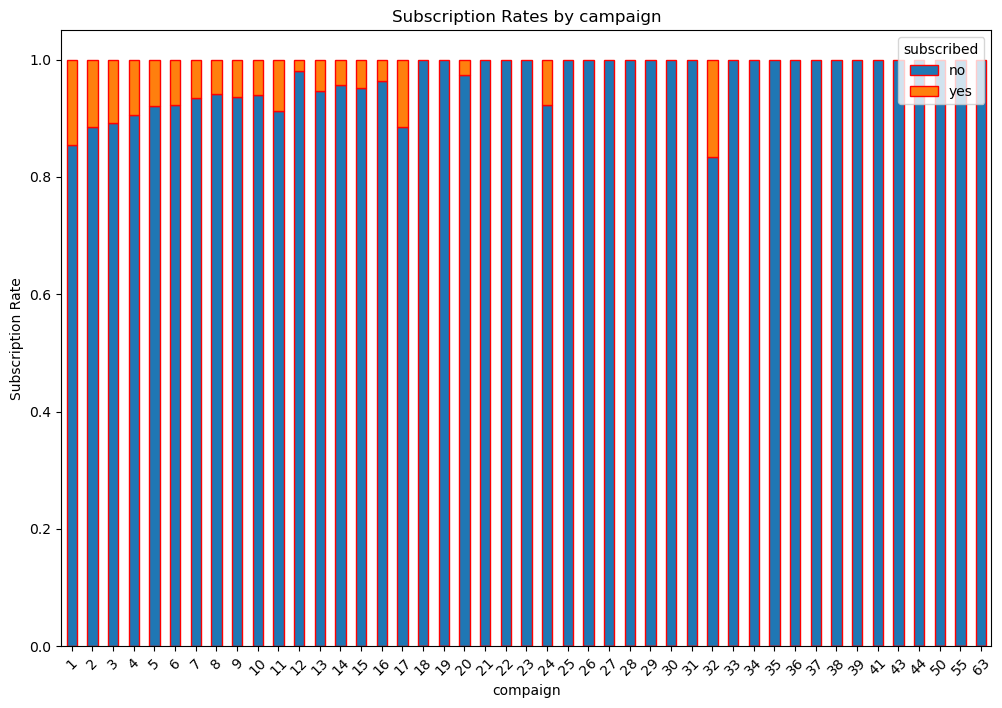

In [48]:
cat_col1 = 'campaign'
cat_col2 = 'subscribed'
rate_of_subscription = pd.crosstab(df[cat_col1], df[cat_col2], normalize='index')
rate_of_subscription.plot(kind='bar', stacked=True, figsize=(12,8), edgecolor='red')
plt.title(f'Subscription Rates by campaign')
plt.xlabel('compaign')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=45)  
plt.legend(title=cat_col2)
plt.show()

In [49]:
#Not sure if my understanding is correct but subscribed rates were higher when contacted 32 times

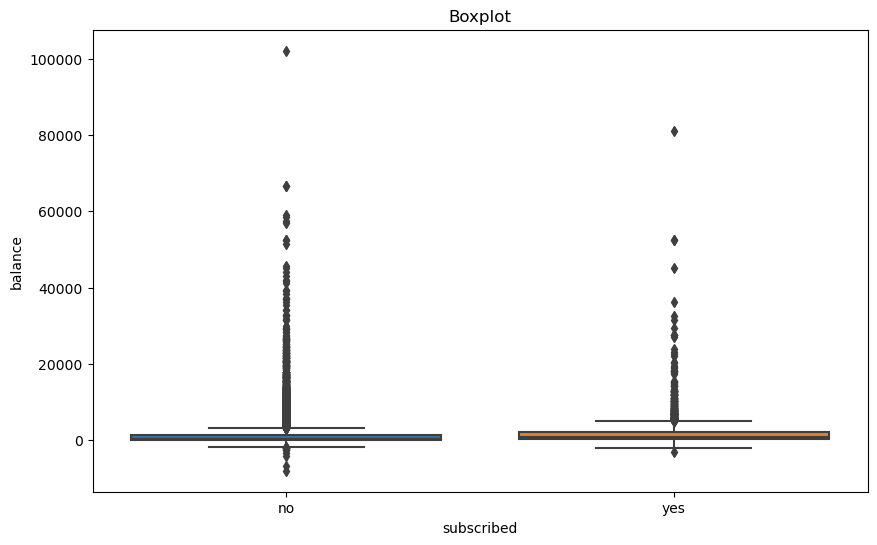

In [50]:
cat_column = 'subscribed'  
num_column = 'balance'   
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[cat_column], y=df[num_column])
plt.title('Boxplot')
plt.show()


In [51]:
cat_column = 'subscribed'
num_column = 'balance'
stats = df.groupby(cat_column)[num_column].agg(['mean', 'median', 'std'])

print(f"Statistic Analysis of {num_column} by {cat_column} status:")
print(stats)

Statistic Analysis of balance by subscribed status:
                   mean  median          std
subscribed                                  
no          1307.779822   418.0  2967.322474
yes         1785.768237   746.0  3423.602275


Here we can see that the mean is quite for high for clients who have subscribed compared to those who have not which suggests that clients with more balance tends to subscribe than those with less balance. the median is also high which indicated the same thing. looking at the std we can see that there is a presence of outliers which can be confirmed by the visual representation executed above.

In [52]:
salary_bins = [-1, 5000, 10000, 20000, 30000, 40000, float('inf')]
bin_labels = ['Under 5k', '5k-10', '10k-20k', '20k-30k', '30k-40k', 'Over 40k']
df['range_salary'] = pd.cut(df['balance'], bins=salary_bins, labels=bin_labels)
subscription_rate = df.groupby('range_salary')['subscribed'].value_counts(normalize=True).unstack() * 100
print(subscription_rate)

subscribed           no        yes
range_salary                      
Under 5k      87.853861  12.146139
5k-10         84.957627  15.042373
10k-20k       84.269663  15.730337
20k-30k       88.172043  11.827957
30k-40k       84.210526  15.789474
Over 40k      80.952381  19.047619


In [53]:
#Again, this suggest that people with atleast over 10k are more likely to deposit than clients with less salary

In [54]:
cat_column = 'education'
num_column = 'balance'
stats = df.groupby(cat_column)[num_column].agg(['mean', 'median', 'std'])

print(f"Statistic Analysis of {num_column} by {cat_column} status:")
print(stats)

Statistic Analysis of balance by education status:
                  mean  median          std
education                                  
primary    1263.221506   407.0  2660.176302
secondary  1149.858420   389.0  2567.326753
tertiary   1763.573917   587.0  3823.412809
unknown    1545.785388   573.0  2893.792266


In [55]:
#Here we can also see that the mean is quite high for clients with tertiary education which indicates that clients with higher level of education tends to have higher income and thus are more likely to deposit

Descriptive statistics of balance for each job category:

                      mean  median          std
job                                            
admin.         1111.109336   390.0  2513.078384
blue-collar    1069.550132   381.0  2295.986529
entrepreneur   1544.754960   389.0  4072.736608
housemaid      1469.773455   402.0  3260.526824
management     1755.432143   583.0  3761.209441
retired        2018.068615   802.0  4163.330062
self-employed  1700.780944   534.0  3889.788395
services       1022.295212   342.0  2260.755905
student        1412.192126   508.0  2350.960831
technician     1257.465235   430.0  2548.008836
unemployed     1497.725967   532.0  3242.643735
unknown        1626.378641   638.5  2868.391153


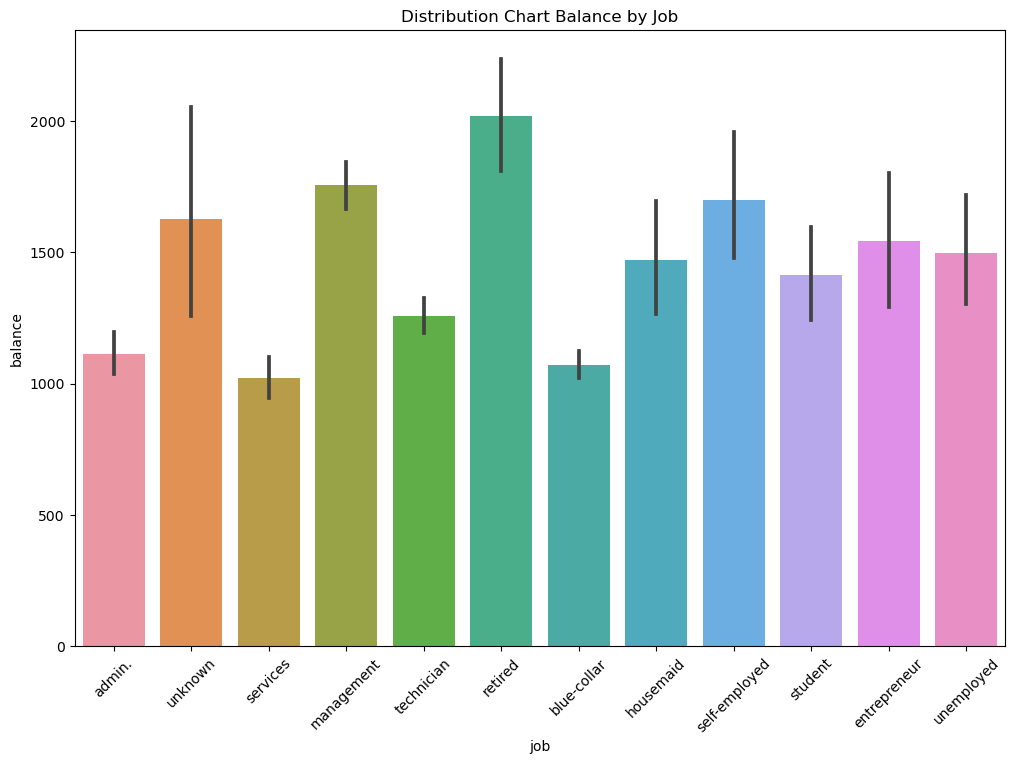

Descriptive statistics of balance for each marital category:

                 mean  median          std
marital                                   
divorced  1212.203030   361.5  3093.484362
married   1410.935847   473.0  3054.603466
single    1324.917956   448.0  2941.486638


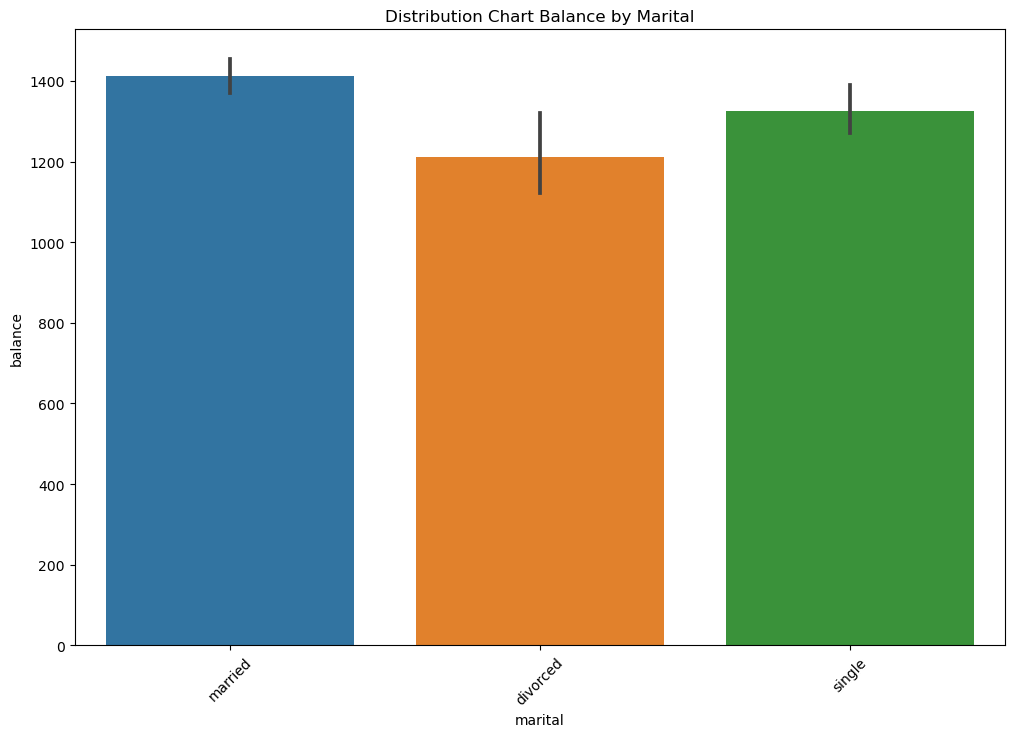

Descriptive statistics of balance for each education category:

                  mean  median          std
education                                  
primary    1263.221506   407.0  2660.176302
secondary  1149.858420   389.0  2567.326753
tertiary   1763.573917   587.0  3823.412809
unknown    1545.785388   573.0  2893.792266


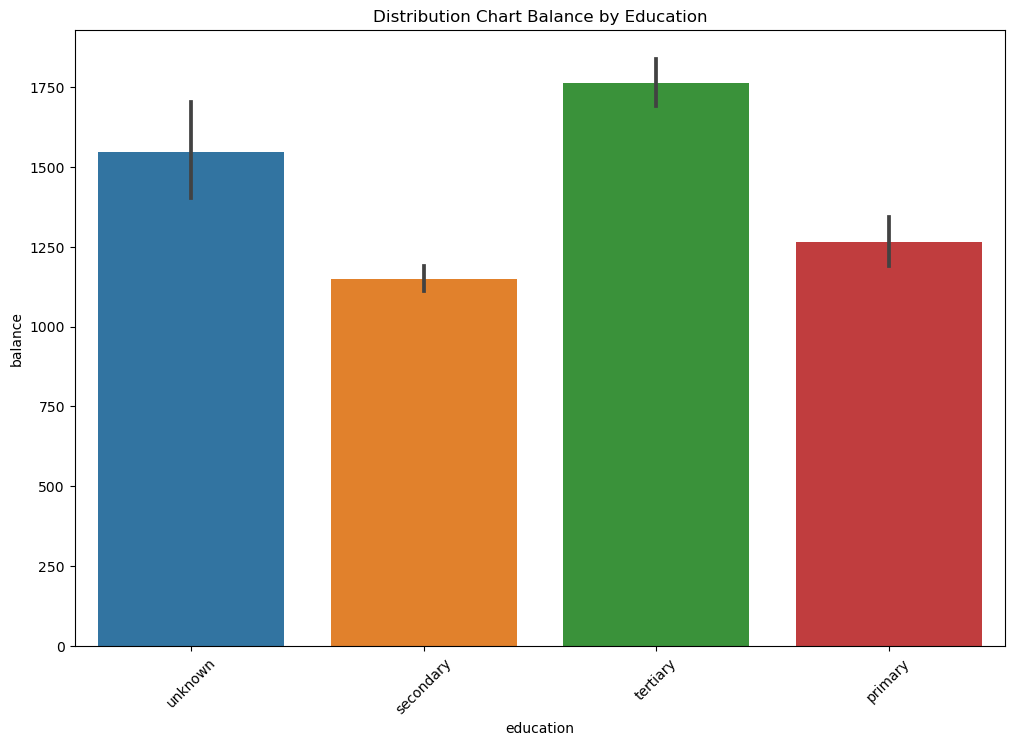

Descriptive statistics of balance for each age category:

            mean  median          std
age                                  
18    426.875000   132.0   640.611190
19    684.681818   329.0  1167.616595
20    945.692308   215.0  1877.150278
21    975.187500   410.5  1372.027288
22    987.825581   361.0  1751.077713
..           ...     ...          ...
90    712.000000   712.0          NaN
92    775.000000   775.0          NaN
93    775.000000   775.0          NaN
94   1234.000000  1234.0          NaN
95   2282.000000  2282.0          NaN

[76 rows x 3 columns]


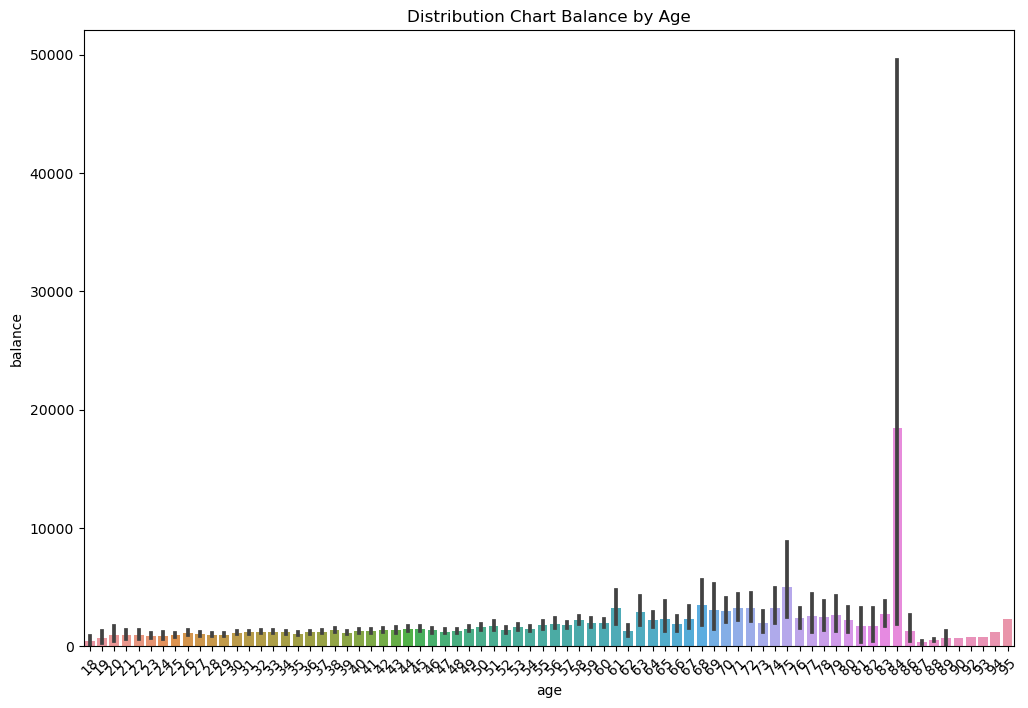

In [56]:
categorical_columns = ['job', 'marital', 'education','age']  
num_column = 'balance'
for cat_column in categorical_columns:
    stats = df.groupby(cat_column)[num_column].agg(['mean', 'median', 'std'])
    print(f"Descriptive statistics of {num_column} for each {cat_column} category:\n")
    print(stats)
    plt.figure(figsize=(12, 8))
    sns.barplot(x=cat_column, y=num_column, data=df)
    plt.title(f'Distribution Chart {num_column.capitalize()} by {cat_column.capitalize()}')
    plt.xticks(rotation=45)
    plt.show()

In [57]:
#Some more distributiion charts
#Here we can see that the higher level of balance are in retired clients and clients working under management followed by self employed clients.
#We can also see the divorced client's have low level of balance and the highest level fo balance is found for married clients
#Clients with tertiary education have higher level of balance compared to the other groups
#Clients with tertiary education tends to have higher balance and thus higher chances of subscribing 
#finally clients above the age of 60 tends to have higher balance and thus higher chances of depositing as well as the bank can offer them various financial services since the acceptance chances seems to be higher for this group compared to other groups

In [58]:
num_col

Index(['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous'],
      dtype='object')

In [59]:
cat_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'subscribed'],
      dtype='object')

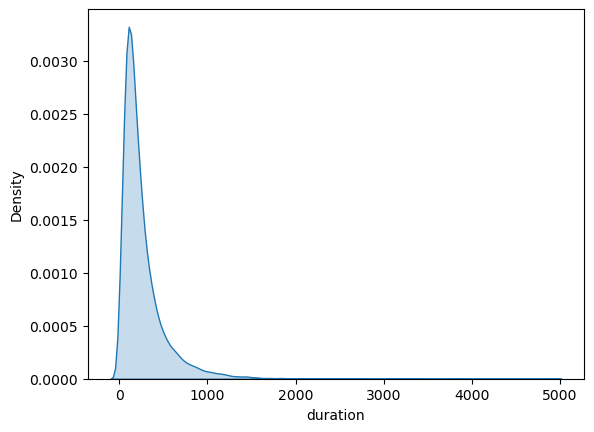

In [60]:
sns.kdeplot(df['duration'], shade=True)
plt.show()

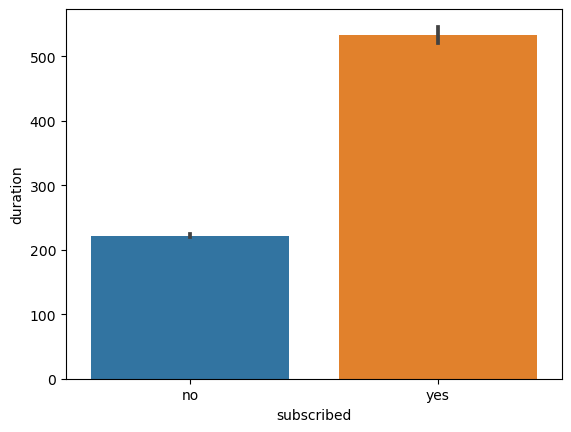

In [61]:
sns.barplot(x='subscribed', y='duration', data=df)
plt.show()

In [62]:
#The higher the duration the higher the subscribed rate

In [63]:
bins = [0,100,200,300,400,500,600,700,800,900,1000, max(df['duration'])]
labels=[f'{k}-{l}' for k, l in zip(bins[:-1], bins[1:])]
df['ranging_duration']=pd.cut(df['duration'], bins=bins, labels=labels, right=False)

In [64]:
rate_of_subscription=df.groupby('ranging_duration')['subscribed'].apply(lambda x:(x == 'yes').mean())

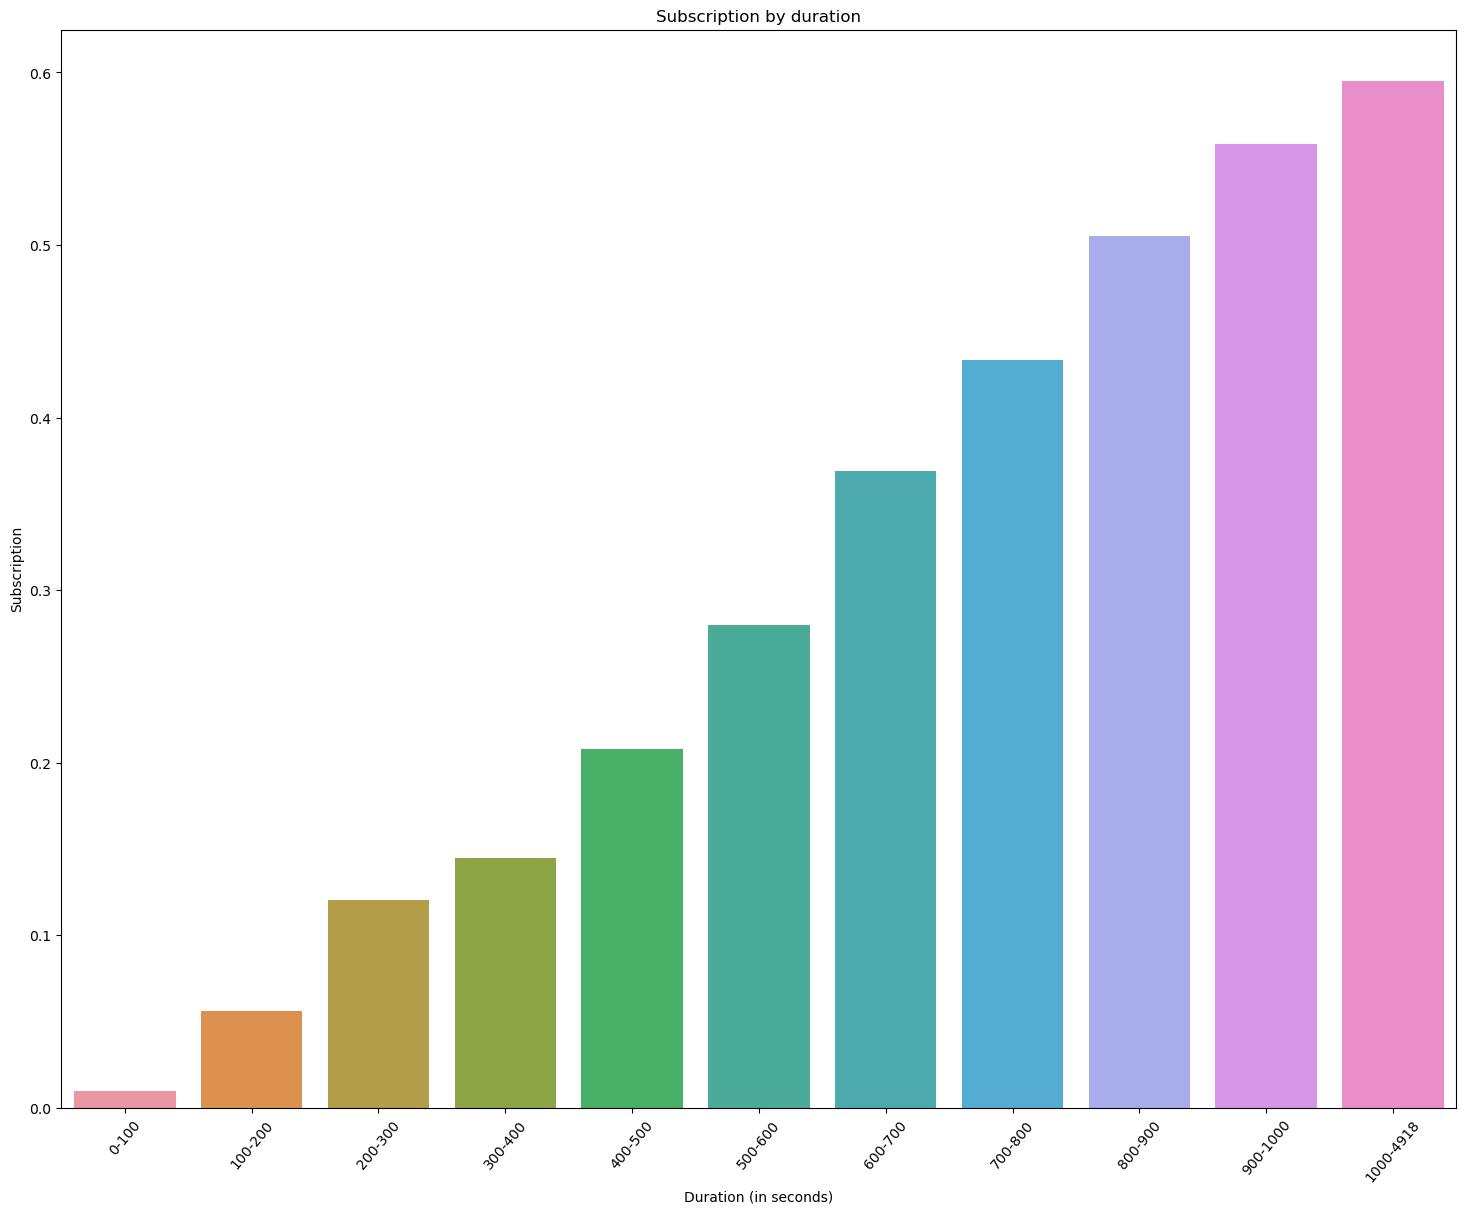

In [65]:
plt.figure(figsize=(18,14))
sns.barplot(x=rate_of_subscription.index, y=rate_of_subscription.values)
plt.xticks(rotation=50)
plt.xlabel('Duration (in seconds)')
plt.ylabel('Subscription')
plt.title('Subscription by duration')
plt.show()

In [66]:
#Here we can see that the higher the duration of the call the higher the chances of subscribed clients. 

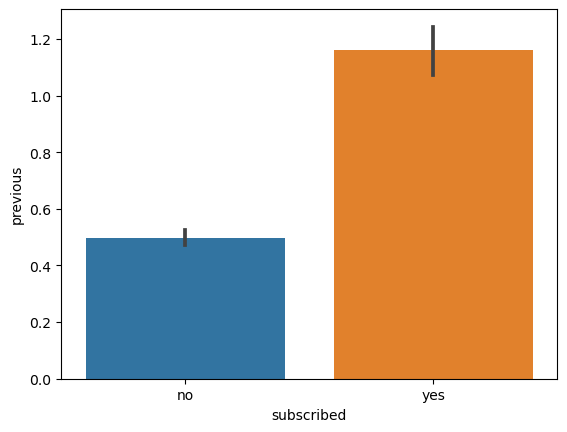

In [67]:
sns.barplot(x='subscribed', y='previous', data=df)
plt.show()

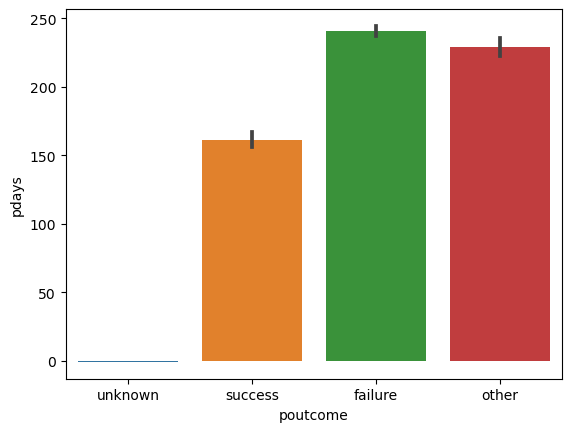

In [68]:
sns.barplot(x='poutcome', y='pdays', data=df)
plt.show()

In [69]:
from sklearn.preprocessing import LabelEncoder
filtered_data = df.copy()
Label_Encoder = {}
for col in cat_col:
    Label_Encoder[col] = LabelEncoder()
    filtered_data[col] = Label_Encoder[col].fit_transform(filtered_data[col])

In [70]:
filtered_data.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,range_salary,ranging_duration
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0,Under 5k,0-100
1,40576,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0,Under 5k,0-100
2,15320,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0,Under 5k,200-300
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1,Under 5k,800-900
4,29842,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0,Under 5k,300-400
5,29390,33,4,2,2,0,0,1,0,0,2,3,116,3,-1,0,3,0,Under 5k,100-200
6,40444,56,5,1,1,0,1044,0,0,1,3,5,353,2,-1,0,3,1,Under 5k,300-400
7,40194,50,9,2,1,0,1811,0,0,0,8,6,97,4,-1,0,3,0,Under 5k,0-100
8,29824,45,1,0,1,0,1951,1,0,0,4,3,692,1,-1,0,3,0,Under 5k,600-700
9,44676,35,0,1,1,0,1204,0,0,0,3,11,789,2,-1,0,3,0,Under 5k,700-800


In [71]:
filtered_data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed', 'range_salary',
       'ranging_duration'],
      dtype='object')

In [72]:
filtered_data.drop('ranging_duration', axis=1, inplace=True)

In [73]:
filtered_data.drop('range_salary', axis=1, inplace=True)

In [74]:
filtered_data.drop('ID', axis=1, inplace=True)

In [75]:
filtered_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31645,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0


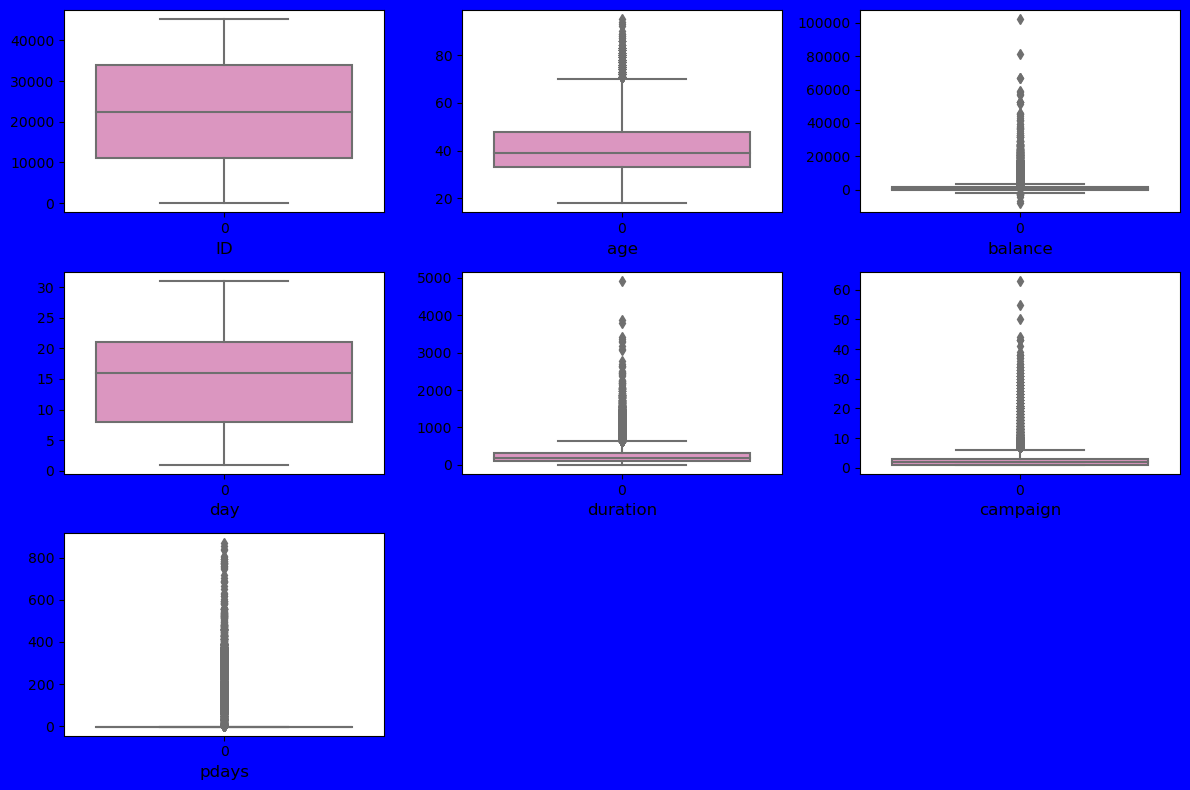

In [76]:
plt.figure(figsize= (12, 8), facecolor= "blue")
pn = 1
for col in num_col:
        if pn<=7:
            ax=plt.subplot(3, 3, pn)
            sns.boxplot(df[col], palette='Set2_r')
            plt.xlabel(col,fontsize = 12)
            plt.yticks(rotation = 0, fontsize = 10)
        pn+=1
plt.tight_layout()

In [77]:
#Here we do see the presence of outliers. It will be kept for now to see whether it drastically impacts our analysis or not

In [78]:
cor = filtered_data.corr()

In [79]:
cor

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.020765,-0.406024,-0.102356,-0.016117,0.103245,-0.183775,-0.012657,0.026733,-0.011056,-0.038368,-0.003870,0.005733,-0.021947,0.005761,0.006466,0.024538
job,-0.020765,1.000000,0.066124,0.170347,-0.005217,0.020638,-0.125347,-0.039049,-0.078253,0.020951,-0.089384,0.002694,0.001469,-0.022552,-0.003032,0.007101,0.038921
marital,-0.406024,0.066124,1.000000,0.107547,-0.009591,0.003487,-0.017846,-0.041654,-0.040180,-0.007686,-0.003834,0.011544,-0.009394,0.019741,0.012717,-0.019770,0.046043
education,-0.102356,0.170347,0.107547,1.000000,-0.006774,0.065176,-0.095376,-0.045950,-0.112000,0.017902,-0.055967,0.003842,0.006142,-0.001566,0.015280,-0.019007,0.066051
default,-0.016117,-0.005217,-0.009591,-0.006774,1.000000,-0.069422,-0.011823,0.081567,0.014053,0.009996,0.004694,-0.010849,0.018538,-0.029622,-0.015877,0.035067,-0.020168
balance,0.103245,0.020638,0.003487,0.065176,-0.069422,1.000000,-0.067466,-0.083631,-0.024083,0.003461,0.023056,0.024274,-0.012032,0.001789,0.013843,-0.019629,0.050807
housing,-0.183775,-0.125347,-0.017846,-0.095376,-0.011823,-0.067466,1.000000,0.036244,0.195103,-0.025666,0.271442,0.003021,-0.021076,0.118790,0.034231,-0.092677,-0.141092
loan,-0.012657,-0.039049,-0.041654,-0.045950,0.081567,-0.083631,0.036244,1.000000,-0.009213,0.014769,0.024186,-0.012781,0.009340,-0.020078,-0.009258,0.010919,-0.072266
contact,0.026733,-0.078253,-0.040180,-0.112000,0.014053,-0.024083,0.195103,-0.009213,1.000000,-0.027046,0.362934,-0.016503,0.022666,-0.245076,-0.141098,0.272083,-0.150051
day,-0.011056,0.020951,-0.007686,0.017902,0.009996,0.003461,-0.025666,0.014769,-0.027046,1.000000,-0.000604,-0.032288,0.159168,-0.087626,-0.048752,0.077586,-0.029600


<Axes: >

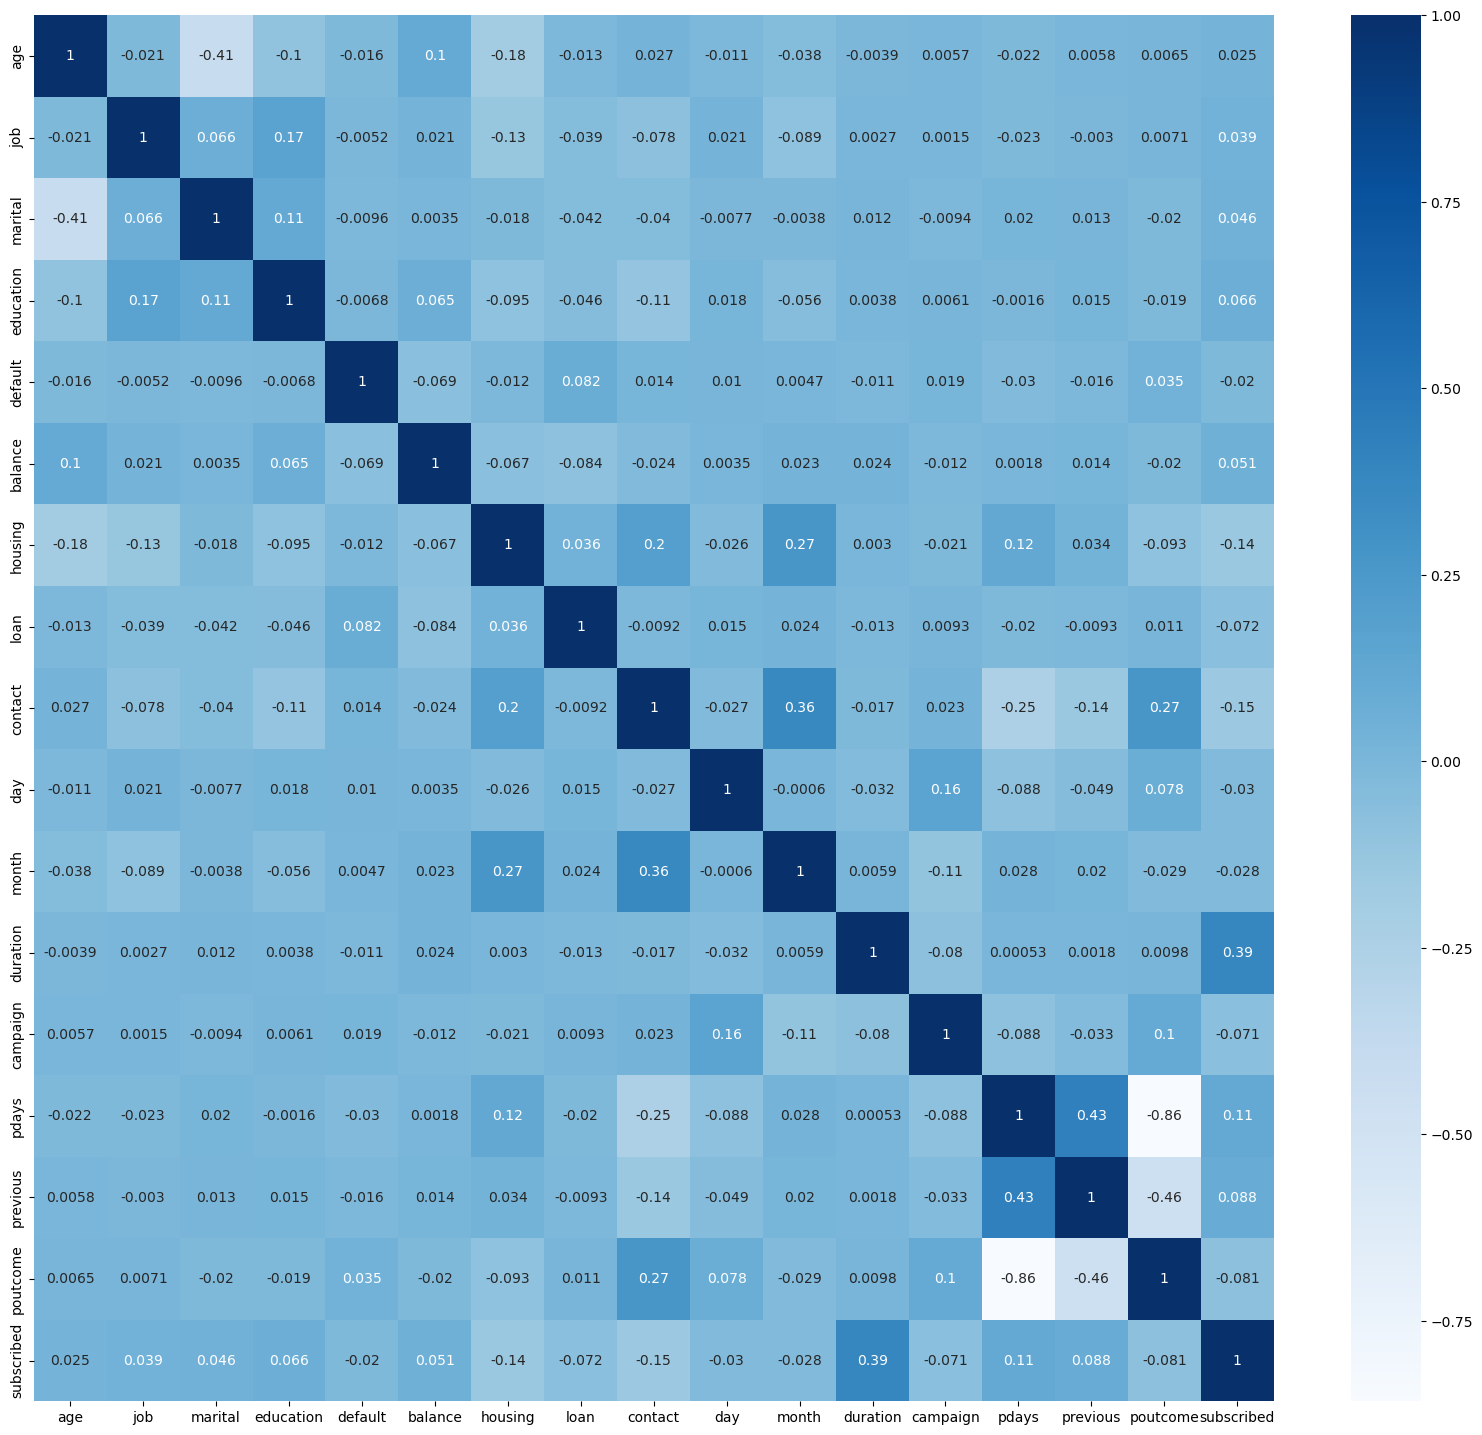

In [80]:
plt.figure(figsize=(20,18))
sns.heatmap(cor, cmap='Blues', annot=True)

In [81]:
#We can see that the duration and subscribed are positively correlated. pdays and poutcome are correlated plus previous and outcome

In [82]:
cor['subscribed'].sort_values(ascending = False)

subscribed    1.000000
duration      0.389838
pdays         0.108290
previous      0.088081
education     0.066051
balance       0.050807
marital       0.046043
job           0.038921
age           0.024538
default      -0.020168
month        -0.028088
day          -0.029600
campaign     -0.070607
loan         -0.072266
poutcome     -0.080895
housing      -0.141092
contact      -0.150051
Name: subscribed, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

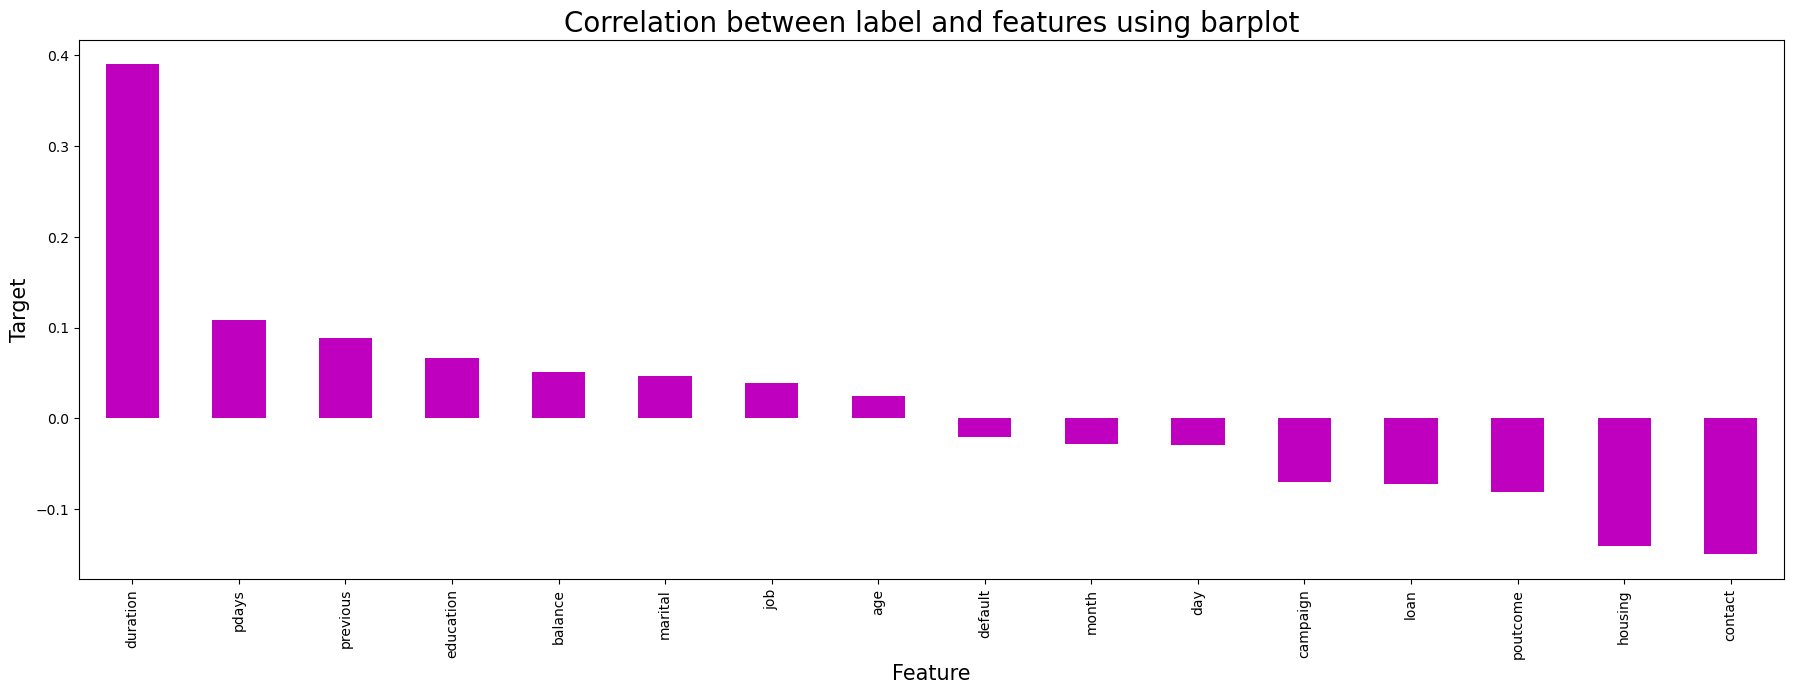

In [83]:
plt.figure(figsize = (22,7))
filtered_data.corr()['subscribed'].sort_values(ascending = False).drop(['subscribed']).plot(kind='bar',color='m')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title("Correlation between label and features using barplot", fontsize=20)
plt.show

In [84]:
#Here we can see that duration is highly correlated with subscribed followed by pdays and previous. Moreover, housing and contact are negatively correlated with subscribed

In [85]:
filtered_data.skew()

age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

In [86]:
filtered_data['previous'] = np.cbrt(filtered_data['previous'])

In [87]:
filtered_data['previous'].skew()

2.079738303449781

In [88]:
filtered_data.skew()

age           0.681607
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance       7.995696
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      3.199766
campaign      4.873935
pdays         2.642374
previous      2.079738
poutcome     -1.996421
subscribed    2.377445
dtype: float64

In [89]:
filtered_data['campaign'] = np.cbrt(filtered_data['campaign'])

In [90]:
filtered_data['campaign'].skew()

1.6679384708924412

In [91]:
N = filtered_data.drop(['subscribed'], axis =1)
Y = filtered_data['subscribed']

In [92]:
Y.value_counts()   #Imbalanced class

subscribed
0    27932
1     3715
Name: count, dtype: int64

In [93]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
N = pd.DataFrame(SS.fit_transform(N), columns = N.columns)
N

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.415793,-1.324317,-0.275405,2.369229,-0.137234,0.187933,-1.118201,-0.439893,0.395076,0.379579,1.154007,-0.832754,-0.127816,-0.408555,-0.449105,0.441777
1,-0.937156,2.037729,-0.275405,-0.300345,-0.137234,-0.449397,-1.118201,-0.439893,-0.716695,0.499526,-0.177462,-0.649957,-0.127816,-0.408555,-0.449105,0.441777
2,-1.313627,0.815167,-0.275405,-0.300345,-0.137234,-0.156159,0.894294,-0.439893,-0.716695,0.259631,-0.177462,-0.070449,-0.873593,-0.408555,-0.449105,0.441777
3,1.509911,-0.101755,-1.922374,1.034442,-0.137234,0.635055,-1.118201,-0.439893,-0.716695,0.739422,0.155405,2.368149,-0.873593,0.447299,2.189741,-0.576498
4,-0.937156,1.426448,-0.275405,-0.300345,-0.137234,-0.411091,0.894294,-0.439893,-0.716695,-1.419637,-0.843197,0.474054,-0.873593,-0.408555,-0.449105,0.441777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,-1.125392,-0.101755,1.371563,1.034442,-0.137234,-0.450388,0.894294,-0.439893,-0.716695,-0.460055,0.821140,-0.552724,-0.127816,-0.408555,-0.449105,0.441777
31643,1.133439,-0.101755,-1.922374,1.034442,-0.137234,-0.324903,-1.118201,2.273280,-0.716695,-1.299690,0.155405,0.699635,-0.127816,-0.408555,-0.449105,0.441777
31644,-0.843038,-0.101755,1.371563,1.034442,-0.137234,-0.347358,-1.118201,-0.439893,-0.716695,-1.059794,-1.508931,-0.859979,0.395329,-0.408555,-0.449105,0.441777
31645,1.509911,1.426448,-0.275405,-0.300345,-0.137234,-0.376088,0.894294,-0.439893,0.395076,-0.100212,0.821140,-0.918319,1.745828,2.994723,3.739801,-2.613048


In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(N.values, r) for r in range(len(N.columns))]
vif["N Variables"] = N.columns

vif

,VIF values,N Variables
0,1.284190,age
1,1.050511,job
2,1.223113,marital
3,1.067738,education
4,1.012913,default
5,1.034507,balance
6,1.197408,housing
7,1.021117,loan
8,1.326540,contact
9,1.039949,day


In [95]:
#I am going to keep all the variables since vif is less than 10

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [97]:
N_train, N_test, Y_train, Y_test = train_test_split(N, Y, random_state=40, test_size=.25)

In [98]:
N_train.shape

(23735, 16)

In [99]:
N_test.shape

(7912, 16)

In [100]:
Y_train.shape

(23735,)

In [101]:
Y_test.shape

(7912,)

In [102]:
Accuracy = 0
random_state = 0
for r in range(1,50):
    N_train,N_test,Y_train,Y_test = train_test_split(N, Y, test_size = 0.40, random_state=r)
    modelRF = RandomForestClassifier()
    modelRF.fit(N_train, Y_train)
    predictor=modelRF.predict(N_test)
    initialscore = accuracy_score(Y_test, predictor)
    if initialscore > Accuracy:
        Accuracy = initialscore
        random_state = r
print("True Accuracy Score: ", Accuracy, "at randomstate:", random_state)

True Accuracy Score:  0.9079706137925586 at randomstate: 46


In [103]:
Accuracy = 0
random_state = 0
for r in range(1,50):
    N_train,N_test,Y_train,Y_test = train_test_split(N, Y, test_size = 0.40, random_state=r)
    LG = LogisticRegression()
    LG.fit(N_train, Y_train)
    predictor=LG.predict(N_test)
    initialscore = accuracy_score(Y_test, predictor)
    if initialscore > Accuracy:
        Accuracy = initialscore
        random_state = r
print("True Accuracy Score: ", Accuracy, "at randomstate:", random_state)

True Accuracy Score:  0.8995181293941069 at randomstate: 10


In [104]:
Accuracy = 0
random_state = 0
for r in range(1,50):
    N_train,N_test,Y_train,Y_test = train_test_split(N, Y, test_size = 0.40, random_state=r)
    modelDT = DecisionTreeClassifier()
    modelDT.fit(N_train, Y_train)
    predictor=modelDT.predict(N_test)
    initialscore = accuracy_score(Y_test, predictor)
    if initialscore > Accuracy:
        Accuracy = initialscore
        random_state = r
print("True Accuracy Score: ", Accuracy, "at randomstate:", random_state)

True Accuracy Score:  0.8762935460936883 at randomstate: 9


In [105]:
Accuracy = 0
random_state = 0
for r in range(1,50):
    N_train,N_test,Y_train,Y_test = train_test_split(N, Y, test_size = 0.40, random_state=r)
    GB = GradientBoostingClassifier()
    GB.fit(N_train, Y_train)
    predictor=GB.predict(N_test)
    initialscore = accuracy_score(Y_test, predictor)
    if initialscore > Accuracy:
        Accuracy = initialscore
        random_state = r
print("True Accuracy Score: ", Accuracy, "at randomstate:", random_state)

True Accuracy Score:  0.9078126234299708 at randomstate: 22


In [106]:
Accuracy = 0
random_state = 0
for r in range(1,50):
    N_train,N_test,Y_train,Y_test = train_test_split(N, Y, test_size = 0.40, random_state=r)
    BC = BaggingClassifier()
    BC.fit(N_train, Y_train)
    predictor=BC.predict(N_test)
    initialscore = accuracy_score(Y_test, predictor)
    if initialscore > Accuracy:
        Accuracy = initialscore
        random_state = r
print("True Accuracy Score: ", Accuracy, "at randomstate:", random_state)

True Accuracy Score:  0.9036258788213919 at randomstate: 9


In [107]:
Accuracy = 0
random_state = 0
for r in range(1,50):
    N_train,N_test,Y_train,Y_test = train_test_split(N, Y, test_size = 0.40, random_state=r)
    KNN = KNeighborsClassifier()
    KNN.fit(N_train, Y_train)
    predictor=KNN.predict(N_test)
    initialscore = accuracy_score(Y_test, predictor)
    if initialscore > Accuracy:
        Accuracy = initialscore
        random_state = r
print("True Accuracy Score: ", Accuracy, "at randomstate:", random_state)

True Accuracy Score:  0.8956473655107039 at randomstate: 42


In [108]:
Accuracy = 0
random_state = 0
for r in range(1,50):
    N_train,N_test,Y_train,Y_test = train_test_split(N, Y, test_size = 0.40, random_state=r)
    ADA = AdaBoostClassifier()
    ADA.fit(N_train, Y_train)
    predictor=ADA.predict(N_test)
    initialscore = accuracy_score(Y_test, predictor)
    if initialscore > Accuracy:
        Accuracy = initialscore
        random_state = r
print("True Accuracy Score: ", Accuracy, "at randomstate:", random_state)

True Accuracy Score:  0.9014140137451615 at randomstate: 9


In [109]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [110]:
models = {
    'LG': LogisticRegression(),
    'RF': RandomForestClassifier(),
    'GB': GradientBoostingClassifier(),
    'ABC': AdaBoostClassifier(),
    'DT': DecisionTreeClassifier(),
    'BC': BaggingClassifier()}


def test_models(models, N_train, N_test, Y_train, Y_test):
    for title, m in models.items():
        m.fit(N_train, Y_train)
        predresults = m.predict(N_test)
        acc = accuracy_score(Y_test, predresults)
        c_matrix = confusion_matrix(Y_test, predresults)
        classification_r = classification_report(Y_test, predresults)
        print(f"output for {title}:")
        print(f"Overall Accuracy: {acc}")
        print("Confusion Matrix:")
        print(c_matrix)
        print("Classification Report:")
        print(classification_r)
        print("\n")

test_models(models, N_train, N_test, Y_train, Y_test)

output for LG:
Overall Accuracy: 0.893988466703531
Confusion Matrix:
[[10900   264]
 [ 1078   417]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11164
           1       0.61      0.28      0.38      1495

    accuracy                           0.89     12659
   macro avg       0.76      0.63      0.66     12659
weighted avg       0.87      0.89      0.88     12659



output for RF:
Overall Accuracy: 0.9011770282012798
Confusion Matrix:
[[10803   361]
 [  890   605]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11164
           1       0.63      0.40      0.49      1495

    accuracy                           0.90     12659
   macro avg       0.78      0.69      0.72     12659
weighted avg       0.89      0.90      0.89     12659



output for GB:
Overall Accuracy: 0.9029149221897464
Confusion Matrix:
[[10840   324]
 [  905   

In [111]:
list_of_classifiers = {
    'LG': LogisticRegression(),
    'RF': RandomForestClassifier(),
    'GB': GradientBoostingClassifier(),
    'ABC': AdaBoostClassifier(),
    'DT': DecisionTreeClassifier(),
    'BC': BaggingClassifier()}
Output = {}

for name, c in list_of_classifiers.items():
    cvs = cross_val_score(c, N, Y, cv=5)
    c.fit(N_train, Y_train)
    predict_test = c.predict(N_test)
    accuracy_testing = accuracy_score(Y_test, predict_test)
    mcv_testcv_difference = accuracy_testing - cvs.mean()
    Output[name] = {
        'Cross Validation Scores': cvs,
        'Mean of Cross Validation Scores': cvs.mean(),
        'Accuracy of the test': accuracy_testing,
        'Overall difference': mcv_testcv_difference}

for name, m in Output.items():
    print(f"{name}:")
    print(f"Cross-Validation Scores: {m['Cross Validation Scores']}")
    print(f"Mean Cross-Validation: {m['Mean of Cross Validation Scores']}")
    print(f"Accuracy: {m['Accuracy of the test']}")
    print(f"Difference: {m['Overall difference']}\n")

LG:
Cross-Validation Scores: [0.89526066 0.89652449 0.89366409 0.89287407 0.89587613]
Mean Cross-Validation: 0.8948398867072183
Accuracy: 0.893988466703531
Difference: -0.0008514200036872088

RF:
Cross-Validation Scores: [0.90947867 0.9028436  0.90188023 0.90267025 0.90282825]
Mean Cross-Validation: 0.9039402015397414
Accuracy: 0.9021249703768071
Difference: -0.001815231162934361

GB:
Cross-Validation Scores: [0.9056872  0.90410742 0.90172223 0.90267025 0.90219624]
Mean Cross-Validation: 0.9032766694697818
Accuracy: 0.9026779366458646
Difference: -0.000598732823917203

ABC:
Cross-Validation Scores: [0.89383886 0.89826224 0.89208406 0.89729815 0.89619213]
Mean Cross-Validation: 0.8955350892366616
Accuracy: 0.8946994233351766
Difference: -0.0008356659014849832

DT:
Cross-Validation Scores: [0.87298578 0.86840442 0.87059567 0.87438774 0.87422974]
Mean Cross-Validation: 0.8721206702415747
Accuracy: 0.8668931195197093
Difference: -0.005227550721865426

BC:
Cross-Validation Scores: [0.897156

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
gb_param = {'loss': ['log_loss', 'exponential'],
           'n_estimators':[100,200,300],
           'learning_rate':[0.01,0.001,0.1,0.2],
           'max_depth':[2,6,15],
           'min_samples_split':[1.0,0.5,0.9],
           'max_features':['sqrt','log2']}

In [114]:
GVC=GridSearchCV(GradientBoostingClassifier(), gb_param, cv = 5, n_jobs=-1, verbose=1)

In [115]:
GVC.fit(N_train,Y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.001, 0.1, 0.2],
                         'loss': ['log_loss', 'exponential'],
                         'max_depth': [2, 6, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [1.0, 0.5, 0.9],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [116]:
GVC.best_params_

{'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_split': 0.5,
 'n_estimators': 200}

In [117]:
True_model=GradientBoostingClassifier(learning_rate= 0.1, loss = 'log_loss',max_depth=15, max_features = 'sqrt',min_samples_split = 0.5,n_estimators = 200)
True_model.fit(N_train,Y_train)
pred=True_model.predict(N_test)
acc= accuracy_score(Y_test,pred)
print(acc*100)

90.3230902914922


In [118]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

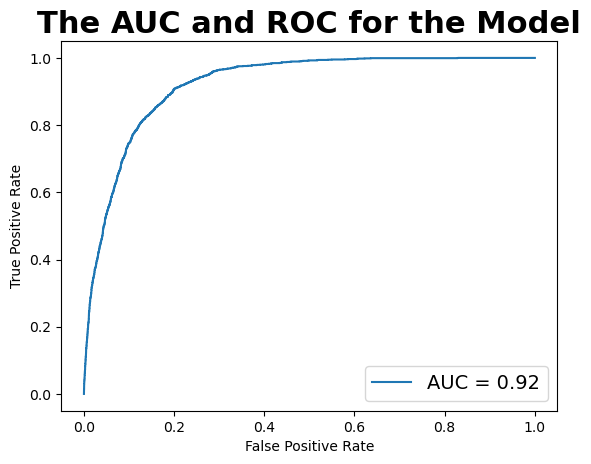

In [119]:
y_score = True_model.predict_proba(N_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_score)
roc_auc = roc_auc_score(Y_test, y_score)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.legend(prop={'size': 14})
plt.title('The AUC and ROC for the Model', fontsize=22, fontweight='bold')
plt.show()

In [120]:
import joblib
joblib.dump(True_model, 'my_trained_model.joblib')

['my_trained_model.joblib']